## 1. Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Importing datasets and analyzing data

In [2]:
pwd

'C:\\Users\\victo\\Documents\\Ironhack\\Projetos\\Project 6 - Clustering'

In [3]:
fifa=pd.read_csv('./Fifa2019.csv')

In [4]:
fifa.shape

(18207, 89)

In [5]:
fifa.head(3)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  

[3 rows x 89 columns]

### Checking Columns and cleaning Missing data

In [8]:
fifa=fifa.drop(columns=['Unnamed: 0'])

In [9]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [10]:
len(fifa['Loaned From'].unique())

342

In [11]:
fifa.loc[:,'LS':'RB']

LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM  ...   LWB  \
0      88+2  88+2  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  ...  64+2   
1      91+3  91+3  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  ...  65+3   
2      84+3  84+3  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  ...  65+3   
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4      82+3  82+3  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  ...  77+3   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
18202  42+2  42+2  42+2  44+2  44+2  44+2  44+2  44+2  45+2  45+2  ...  44+2   
18203  45+2  45+2  45+2  39+2  42+2  42+2  42+2  39+2  40+2  40+2  ...  30+2   
18204  45+2  45+2  45+2  45+2  46+2  46+2  46+2  45+2  44+2  44+2  ...  34+2   
18205  47+2  47+2  47+2  47+2  46+2  46+2  46+2  47+2  45+2  45+2  ...  36+2   
18206  43+2  43+2  43+2  45+2  44+2  44+2  44+2  45+2  45+2  45+2  ...  46+2   

        LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  
0      61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2  
1      61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2      60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3  
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4      77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
18202  45+2  45+2  45+2  44+2  45+2  45+2  45+2  45+2  45+2  
18203  31+2  31+2  31+2  30+2  29+2  32+2  32+2  32+2  29+2  
18204  30+2  30+2  30+2  34+2  33+2  28+2  28+2  28+2  33+2  
18205  32+2  32+2  32+2  36+2  35+2  31+2  31+2  31+2  35+2  
18206  46+2  46+2  46+2  46+2  46+2  47+2  47+2  47+2  46+2  

[18207 rows x 26 columns]

In [12]:
fifa.isna().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [13]:
fifa=fifa.fillna(0)

In [14]:
fifa.isna().sum()

ID                0
Name              0
Age               0
Photo             0
Nationality       0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 88, dtype: int64

### 2.1 Using Heatmap to find correlations between data

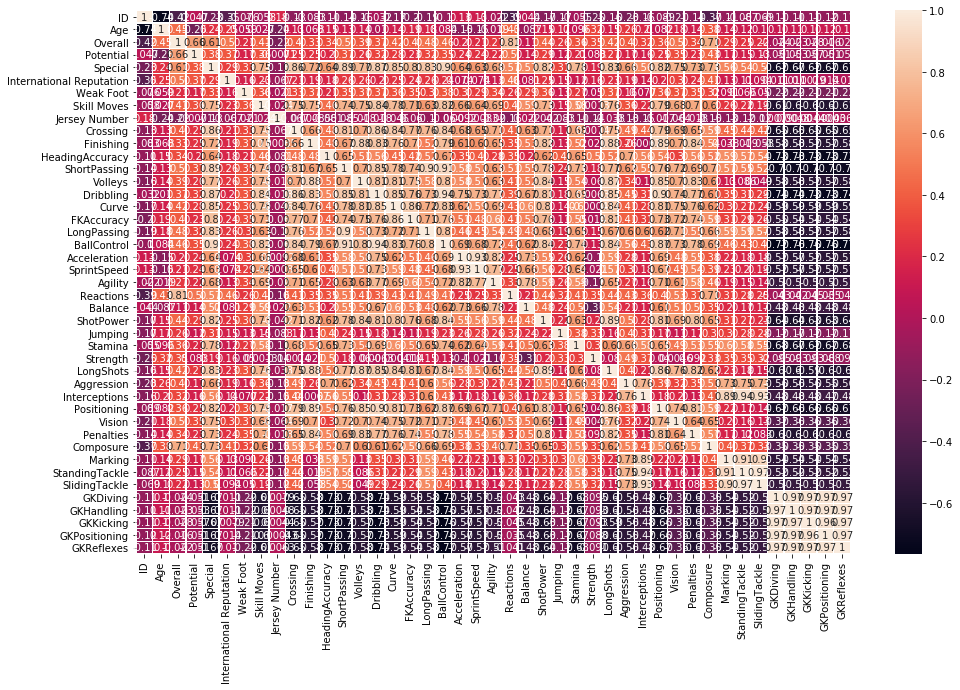

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(fifa.corr(),annot=True,linewidths=.5)

### 2.2 Finding and identifying Outliers

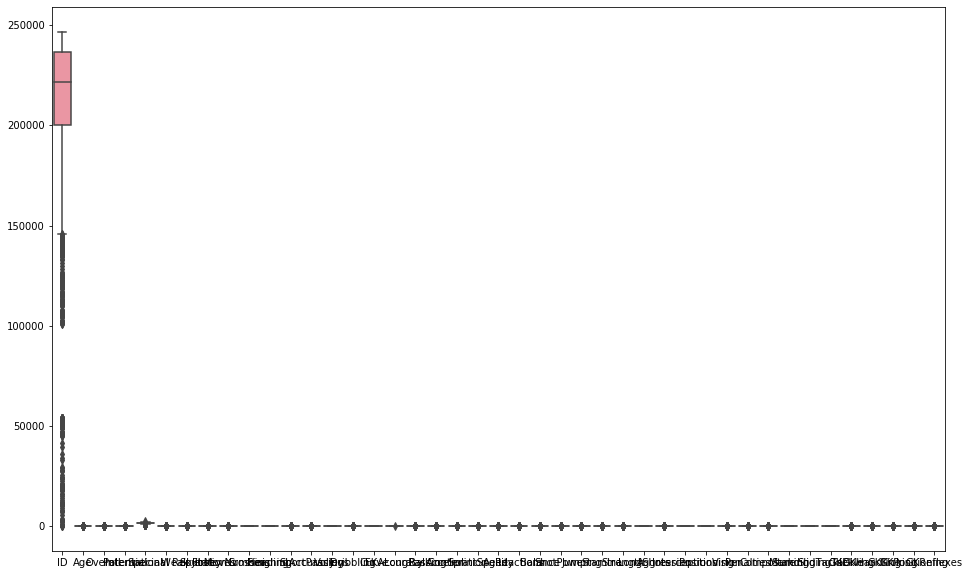

In [16]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(data=fifa)

### 2.3 Checking if distribution is skewed

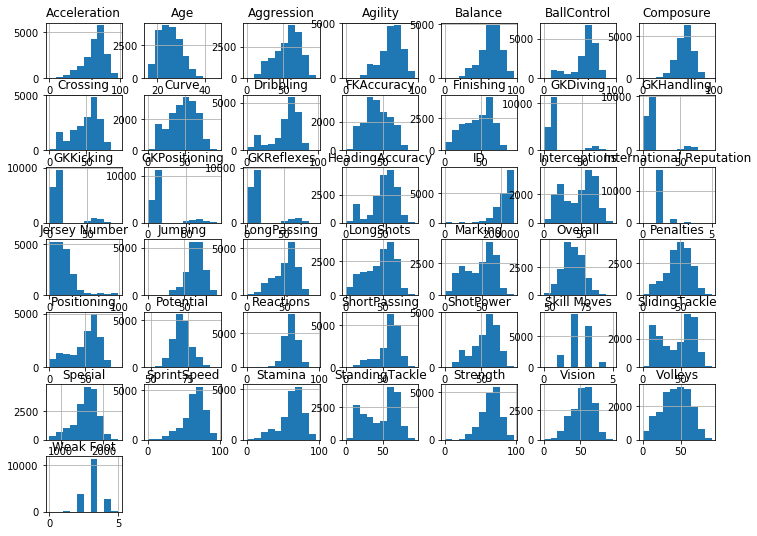

In [17]:
fifa.hist(figsize=(12,9))
plt.show()

## 3. Data processing

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
fifa.head(3)

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   

  Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0            28.0          26.0       6.0        11.0   
1      95.0    28.0            31.0          23.0       7.0        11.0   
2      94.0    27.0            24.0          33.0       9.0         9.0   

   GKKicking GKPositioning GKReflexes Release Clause  
0       15.0          14.0        8.0        €226.5M  
1       15.0          14.0       11.0        €127.1M  
2       15.0          15.0       11.0        €228.1M  

[3 rows x 88 columns]

### Selecting only columns with numerical data in it to check results / Turnung 'Release Clause' to integers

In [20]:
numerical=['Overall','Potential','Composure','Marking','StandingTackle','SlidingTackle',
           'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
fifa[numerical].head(3)

Overall  Potential  Composure  Marking  StandingTackle  SlidingTackle  \
0       94         94       96.0     33.0            28.0           26.0   
1       94         94       95.0     28.0            31.0           23.0   
2       92         93       94.0     27.0            24.0           33.0   

   GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  
0       6.0        11.0       15.0           14.0         8.0  
1       7.0        11.0       15.0           14.0        11.0  
2       9.0         9.0       15.0           15.0        11.0

## 4. Standardize information and apllying Kmeans

In [21]:
from sklearn.cluster import KMeans

In [22]:
scaler = StandardScaler()

In [23]:
numerical_kmeans = ['Overall','Potential','Composure','Marking','StandingTackle','SlidingTackle',
           'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
fifa[numerical_kmeans].head(3)

Overall  Potential  Composure  Marking  StandingTackle  SlidingTackle  \
0       94         94       96.0     33.0            28.0           26.0   
1       94         94       95.0     28.0            31.0           23.0   
2       92         93       94.0     27.0            24.0           33.0   

   GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  
0       6.0        11.0       15.0           14.0         8.0  
1       7.0        11.0       15.0           14.0        11.0  
2       9.0         9.0       15.0           15.0        11.0

In [24]:
numerical_kmeans=fifa
numerical_kmeans=numerical_kmeans[['Overall','Potential','Composure','Marking','StandingTackle','SlidingTackle',
           'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]

In [25]:
scaler.fit(numerical_kmeans)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaled = scaler.transform(numerical_kmeans)

In [27]:
scaled = pd.DataFrame(scaled, columns = numerical)
scaled.head(3)

Overall  Potential  Composure   Marking  StandingTackle  SlidingTackle  \
0  4.018287   3.698092   3.175799 -0.706968       -0.898930      -0.913603   
1  4.018287   3.698092   3.091125 -0.956657       -0.761143      -1.053862   
2  3.728799   3.535128   3.006452 -1.006595       -1.082647      -0.586332   

   GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  
0 -0.597580   -0.316378   -0.07207      -0.137719   -0.482794  
1 -0.541058   -0.316378   -0.07207      -0.137719   -0.315676  
2 -0.428012   -0.434686   -0.07207      -0.079007   -0.315676

In [28]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
fifa['Labels']=kmeans.labels_
fifa.head(3)

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   

  Marking StandingTackle  SlidingTackle GKDiving  GKHandling  GKKicking  \
0    33.0           28.0           26.0      6.0        11.0       15.0   
1    28.0           31.0           23.0      7.0        11.0       15.0   
2    27.0           24.0           33.0      9.0         9.0       15.0   

   GKPositioning GKReflexes Release Clause Labels  
0           14.0        8.0        €226.5M      0  
1           14.0       11.0        €127.1M      0  
2           15.0       11.0        €228.1M      0  

[3 rows x 89 columns]

### 4.1 Using PCA to plot information (Kmeans)

In [30]:
numerical_kmeans

Overall  Potential  Composure  Marking  StandingTackle  SlidingTackle  \
0           94         94       96.0     33.0            28.0           26.0   
1           94         94       95.0     28.0            31.0           23.0   
2           92         93       94.0     27.0            24.0           33.0   
3           91         93       68.0     15.0            21.0           13.0   
4           91         92       88.0     68.0            58.0           51.0   
...        ...        ...        ...      ...             ...            ...   
18202       47         65       45.0     40.0            48.0           47.0   
18203       47         63       42.0     22.0            15.0           19.0   
18204       47         67       41.0     32.0            13.0           11.0   
18205       47         66       46.0     20.0            25.0           27.0   
18206       46         66       43.0     40.0            43.0           50.0   

       GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  
0           6.0        11.0       15.0           14.0         8.0  
1           7.0        11.0       15.0           14.0        11.0  
2           9.0         9.0       15.0           15.0        11.0  
3          90.0        85.0       87.0           88.0        94.0  
4          15.0        13.0        5.0           10.0        13.0  
...         ...         ...        ...            ...         ...  
18202      10.0        13.0        7.0            8.0         9.0  
18203      10.0         9.0        9.0            5.0        12.0  
18204       6.0         5.0       10.0            6.0        13.0  
18205      14.0         6.0       14.0            8.0         9.0  
18206      10.0        15.0        9.0           12.0         9.0  

[18207 rows x 11 columns]

In [31]:
pca = PCA(2)

fifa_std = StandardScaler().fit_transform(numerical_kmeans)
pca.fit(fifa_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pc1 = pca.transform(fifa[numerical])[:, 0]
pc2 = pca.transform(fifa[numerical])[:, 1]

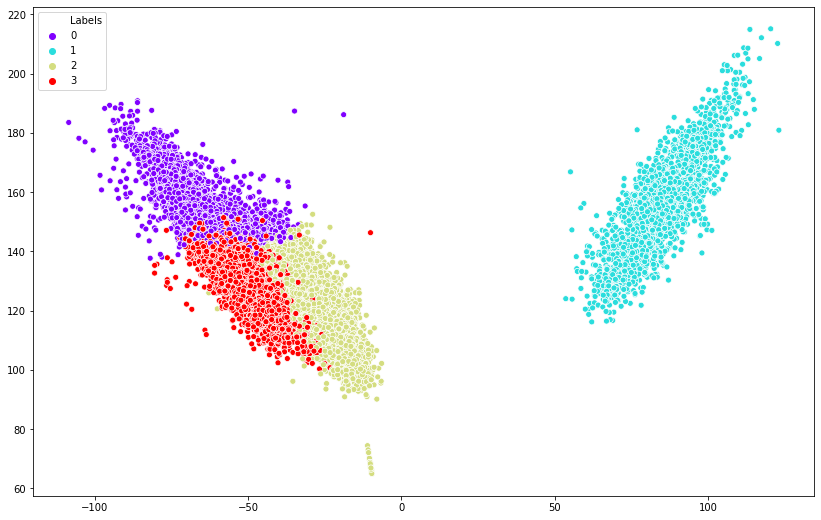

In [33]:
fig, ax = plt.subplots(figsize=(14,9))

sns.scatterplot(pc1, pc2, hue=fifa['Labels'],palette='rainbow')
plt.show()

In [34]:
Using Yellowbrick to check 

SyntaxError: invalid syntax (<ipython-input-34-c02bed77b56b>, line 1)

### 4.2 Checking whe best number of Clusters for this Data with the Kmeans

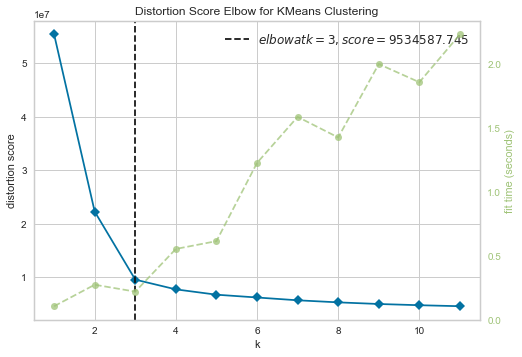

In [36]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(numerical_kmeans)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### 4.3 Using Yellowbricks to understand data

In [37]:
#! pip install yellowbrick

In [38]:
numerical_kmeans.head()

Overall  Potential  Composure  Marking  StandingTackle  SlidingTackle  \
0       94         94       96.0     33.0            28.0           26.0   
1       94         94       95.0     28.0            31.0           23.0   
2       92         93       94.0     27.0            24.0           33.0   
3       91         93       68.0     15.0            21.0           13.0   
4       91         92       88.0     68.0            58.0           51.0   

   GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  
0       6.0        11.0       15.0           14.0         8.0  
1       7.0        11.0       15.0           14.0        11.0  
2       9.0         9.0       15.0           15.0        11.0  
3      90.0        85.0       87.0           88.0        94.0  
4      15.0        13.0        5.0           10.0        13.0

In [39]:
fifa

ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club                                       Club Logo  \
0             FC Barcelona    https://cdn.sofifa.org/teams/2/light/241.png   
1                 Juventus     https://cdn.sofifa.org/teams/2/light/45.png   
2      Paris Saint-Germain     https://cdn.sofifa.org/teams/2/light/73.png   
3        Manchester United     https://cdn.sofifa.org/teams/2/light/11.png   
4          Manchester City     https://cdn.sofifa.org/teams/2/light/10.png   
...                    ...                                             ...   
18202      Crewe Alexandra    https://cdn.sofifa.org/teams/2/light/121.png   
18203       Trelleborgs FF    https://cdn.sofifa.org/teams/2/light/703.png   
18204     Cambridge United   https://cdn.sofifa.org/teams/2/light/1944.png   
18205      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   
18206      Tranmere Rovers  https://cdn.sofifa.org/teams/2/light/15048.png   

       ... Marking StandingTackle  SlidingTackle GKDiving  GKHandling  \
0      ...    33.0           28.0           26.0      6.0        11.0   
1      ...    28.0           31.0           23.0      7.0        11.0   
2      ...    27.0           24.0           33.0      9.0         9.0   
3      ...    15.0           21.0           13.0     90.0        85.0   
4      ...    68.0           58.0           51.0     15.0        13.0   
...    ...     ...            ...            ...      ...         ...   
18202  ...    40.0           48.0           47.0     10.0        13.0   
18203  ...    22.0           15.0           19.0     10.0         9.0   
18204  ...    32.0           13.0           11.0      6.0         5.0   
18205  ...    20.0           25.0           27.0     14.0         6.0   
18206  ...    40.0           43.0           50.0     10.0        15.0   

       GKKicking  GKPositioning GKReflexes Release Clause Labels  
0  

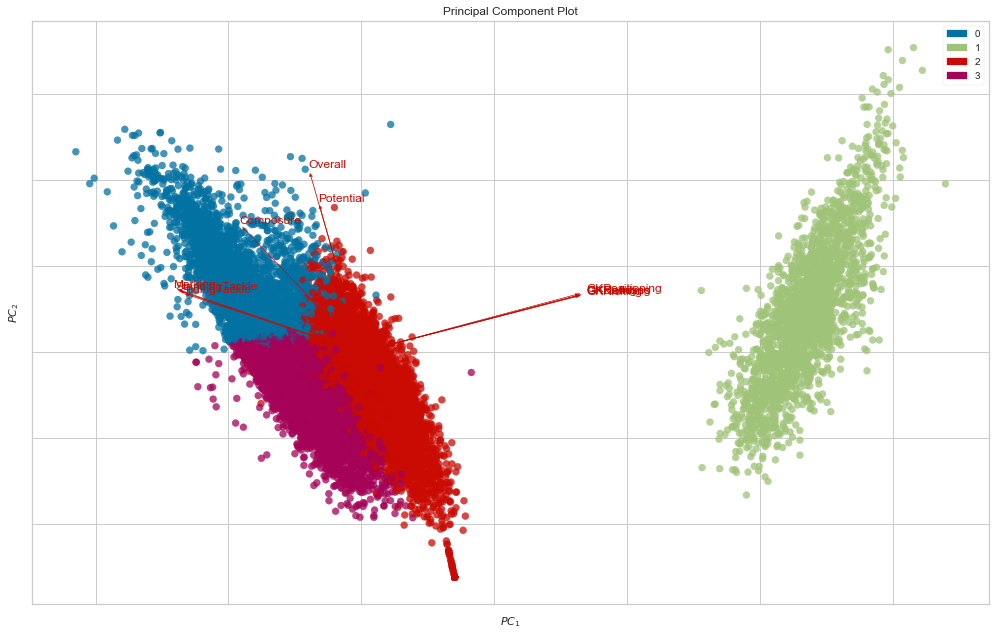

In [40]:
from yellowbrick.features.pca import PCADecomposition

fig, ax = plt.subplots(figsize=(14,9))

visualizer = PCADecomposition(scale=True, proj_features=True)
components = visualizer.fit_transform(numerical_kmeans,fifa['Labels'])
    
visualizer.show()

### 4.3 Plotting graphics to understand data (Using groups found in Kmeans)
#### 4.3.1 Group 0

#### Dropping columns that won't bring any information (has all the values as 0)

In [41]:
a=fifa[fifa['Labels']==0].drop(columns=['ID','Photo','Flag','Club','Club Logo'])

In [42]:
a.shape

(4769, 84)

In [43]:
pd.set_option('display.max_columns',999)

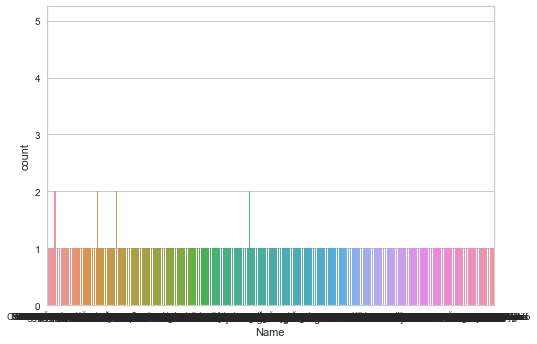

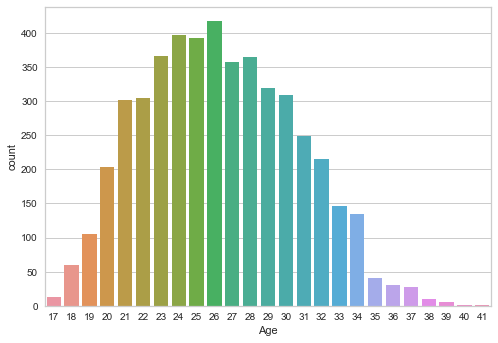

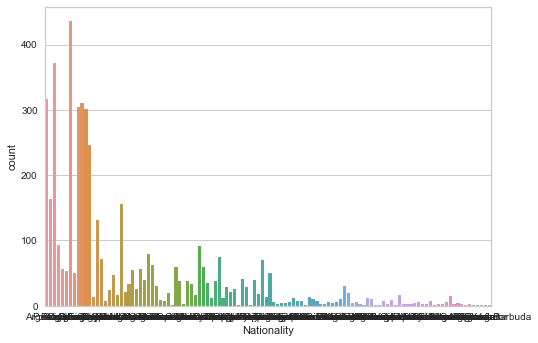

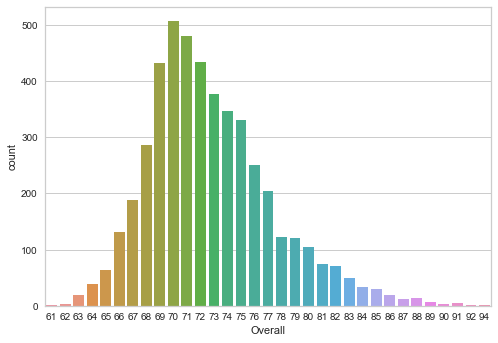

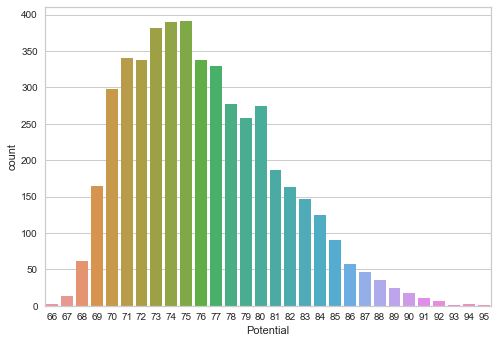

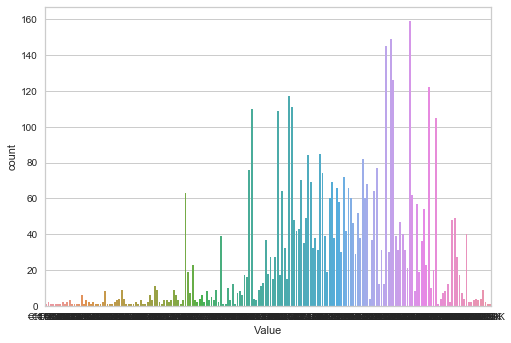

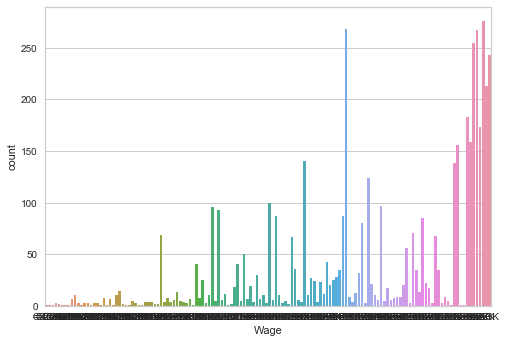

KeyboardInterrupt: 

In [44]:
for column in a.columns:
    sns.countplot(a[column])
    plt.show()

In [45]:
# Variable with columns I found inportant to check
analyze=['Position','Real Face','International Reputation','Weak Foot','Skill Moves','Work Rate','Body Type','Loaned From',
         'Crossing','GKHandling','Preferred Foot','BallControl','FKAccuracy','Penalties','Wage','Nationality','Interceptions','Jersey Number']

In [46]:
analyze2=fifa[analyze].columns

#### 4.3.1 Group 1

In [47]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [48]:
b=fifa[fifa['Labels']==1].drop(columns=['ID','Photo','Flag','Club','Club Logo'])

In [49]:
pd.set_option('display.max_columns',999)

In [50]:
b.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPosition

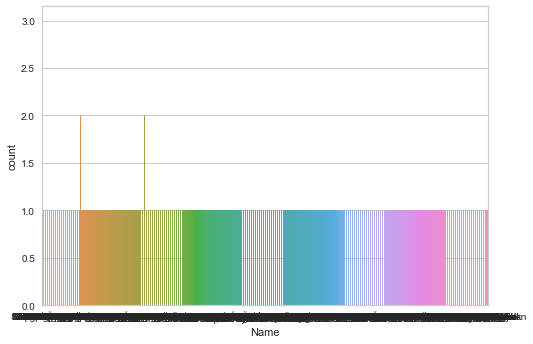

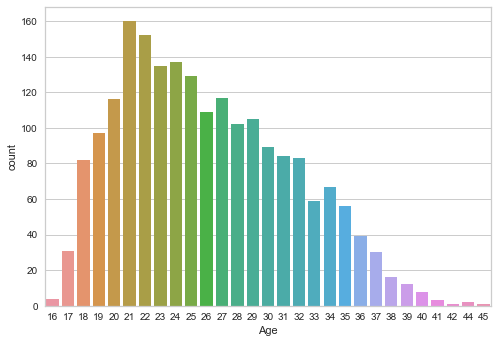

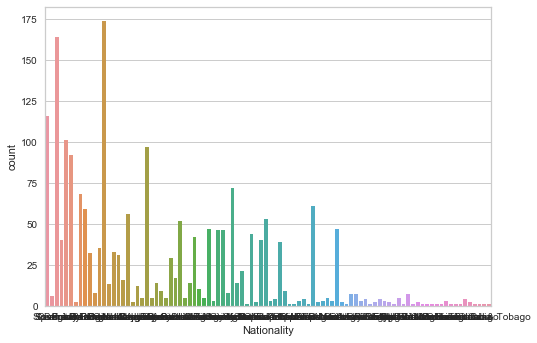

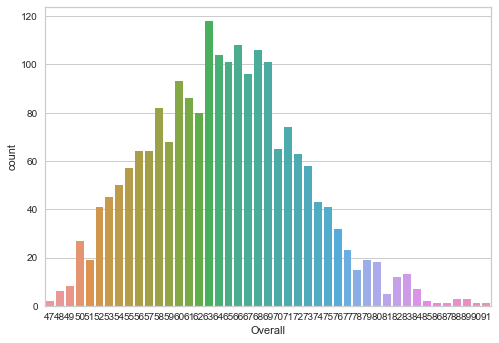

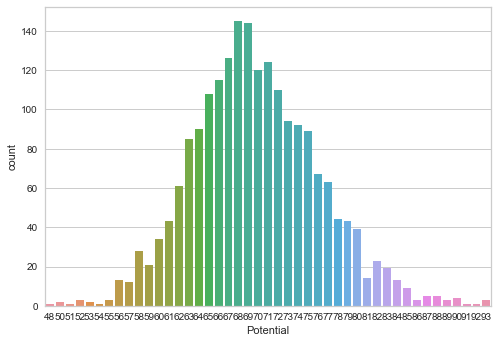

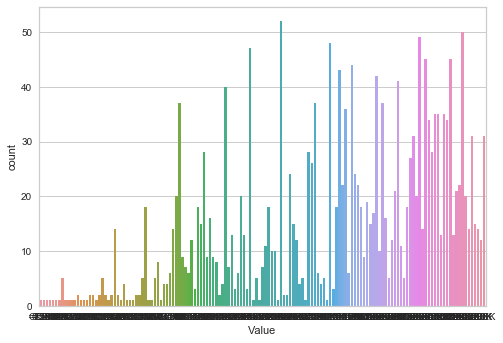

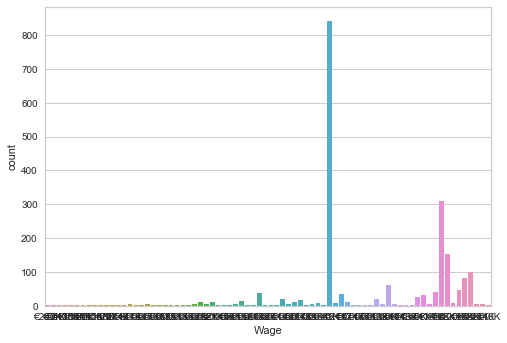

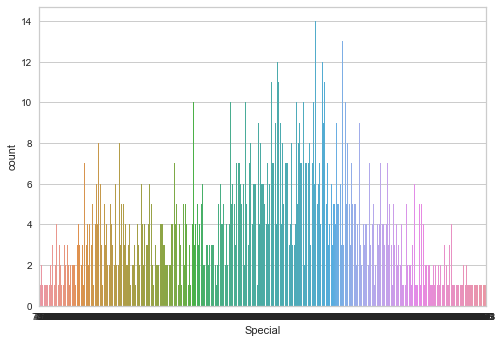

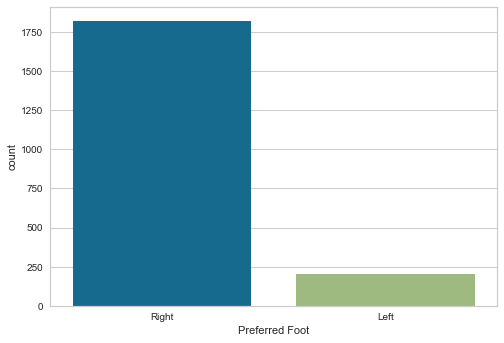

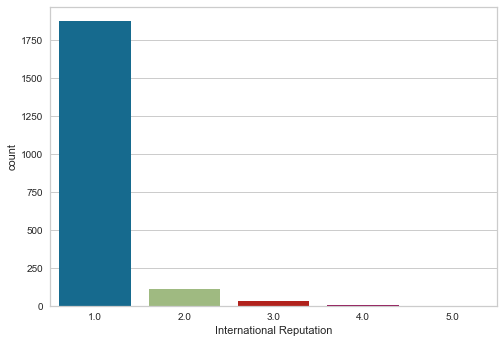

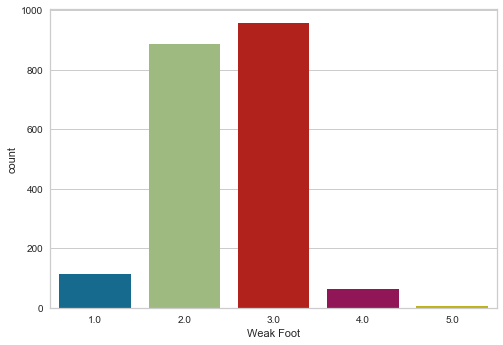

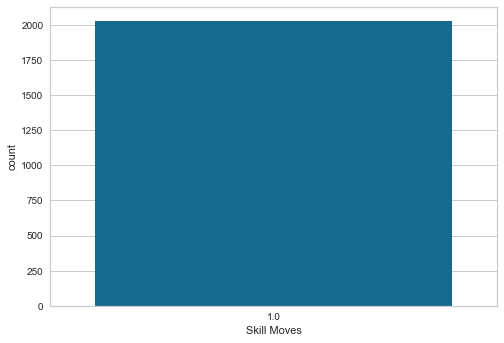

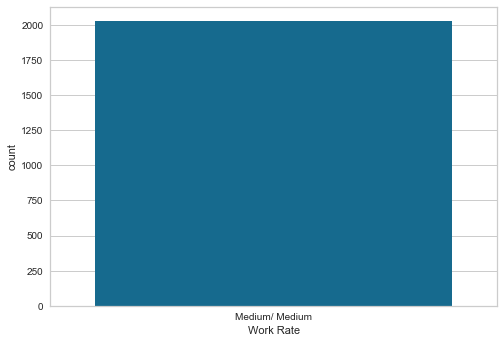

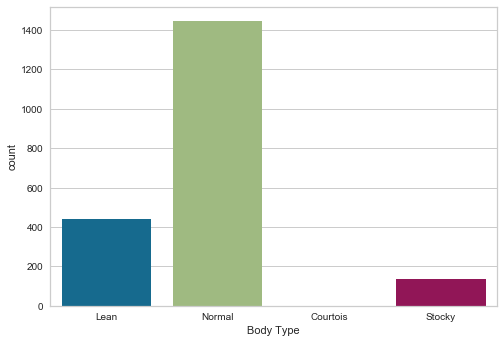

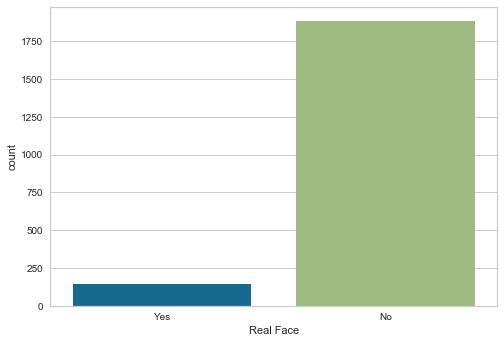

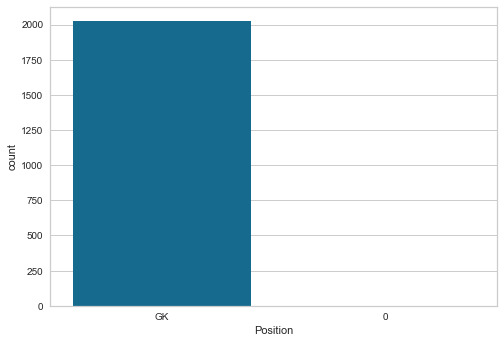

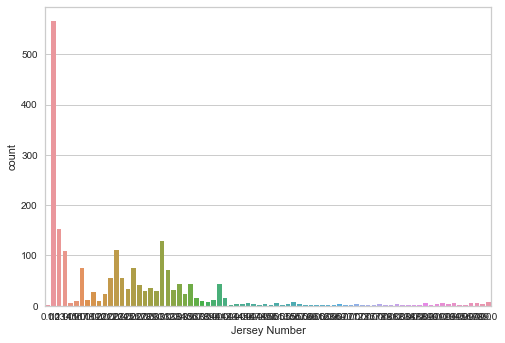

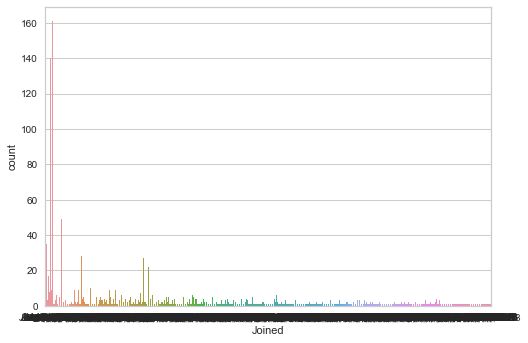

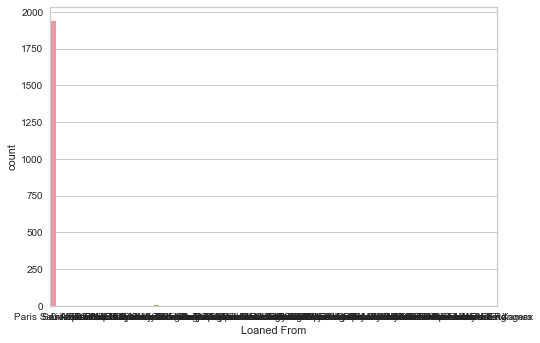

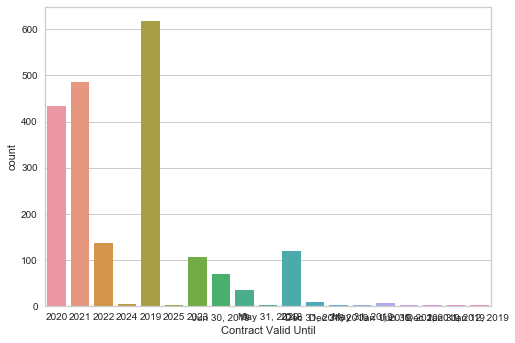

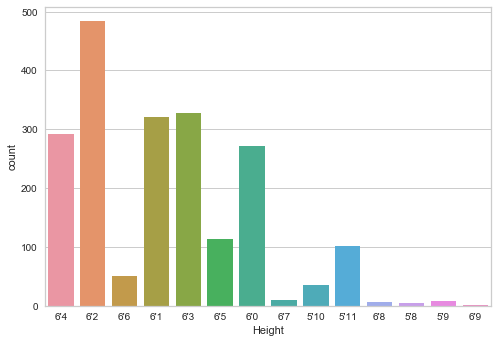

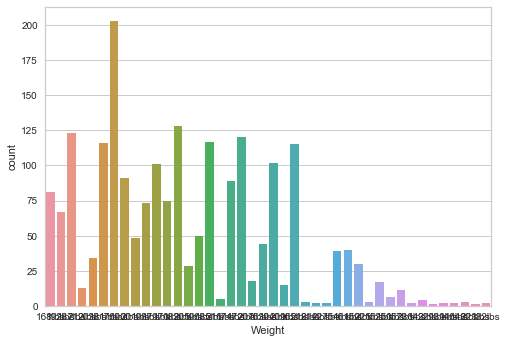

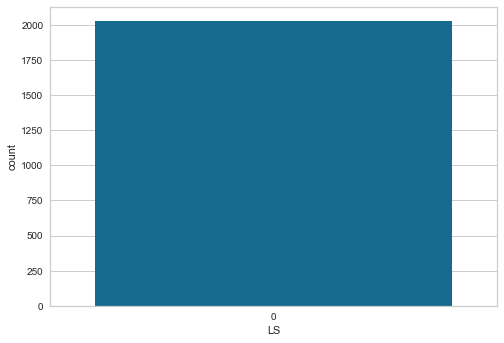

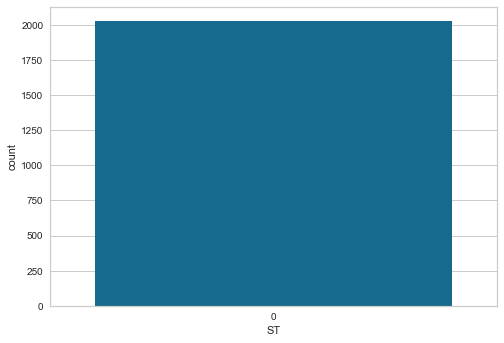

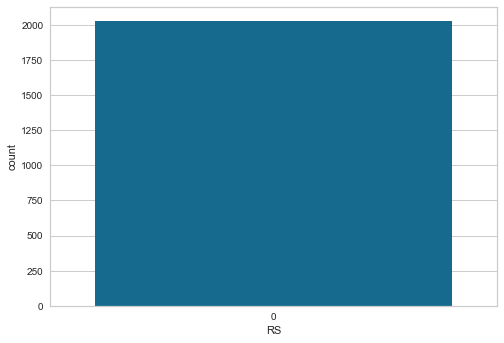

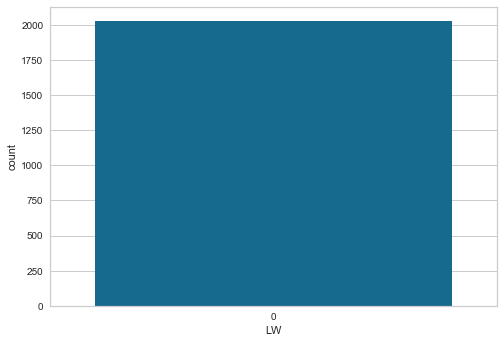

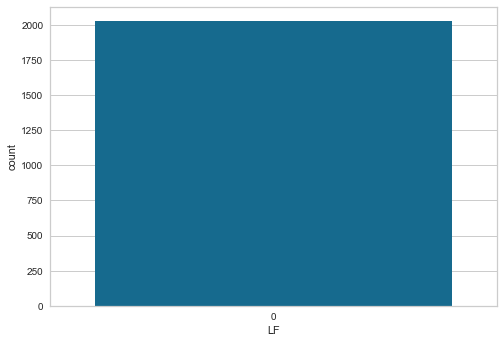

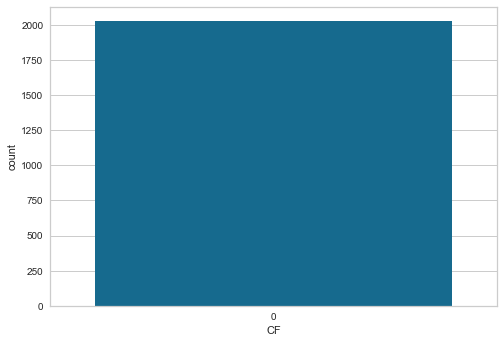

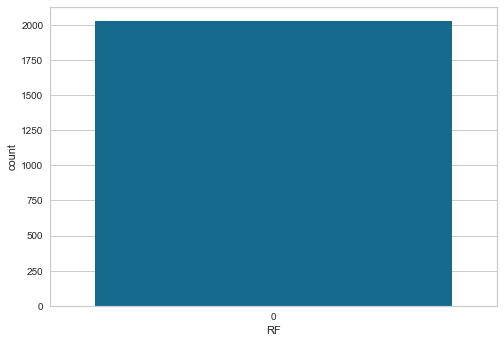

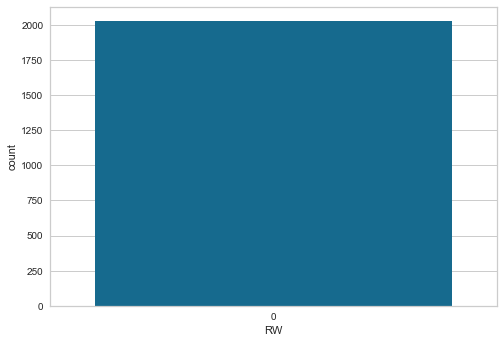

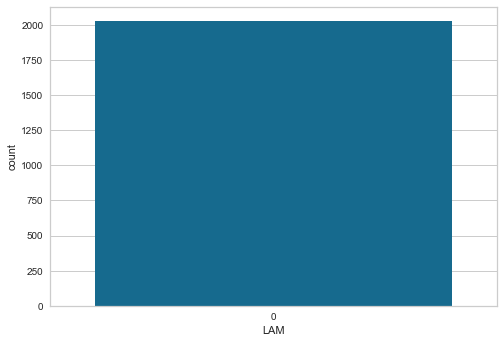

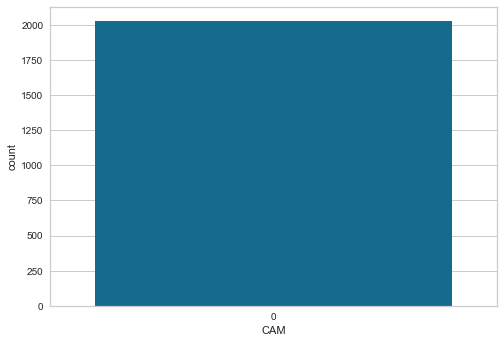

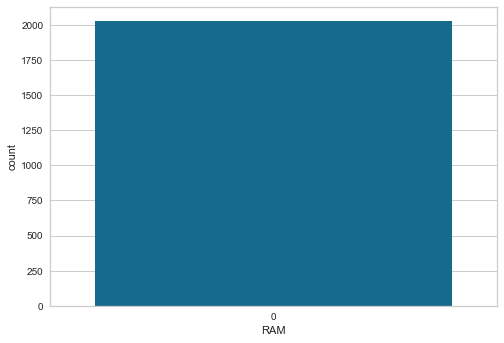

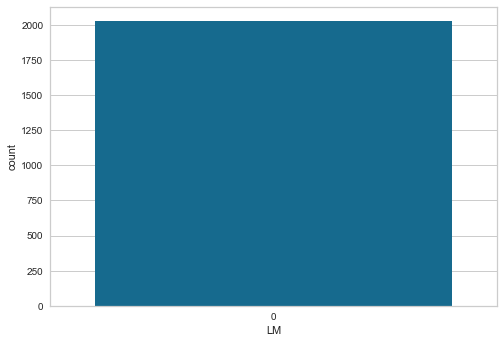

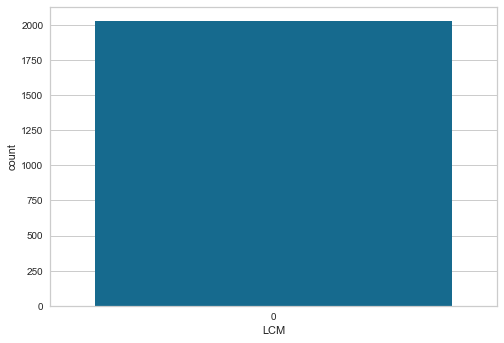

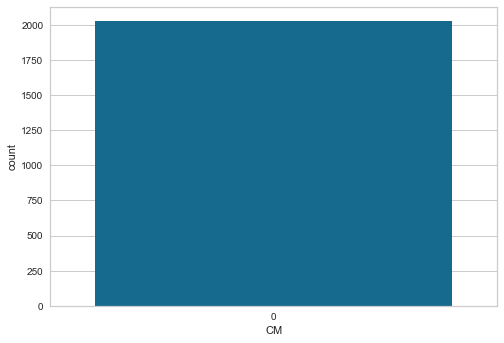

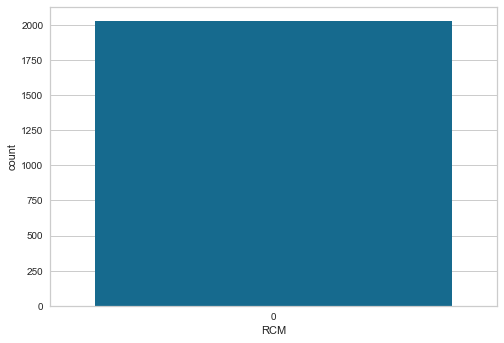

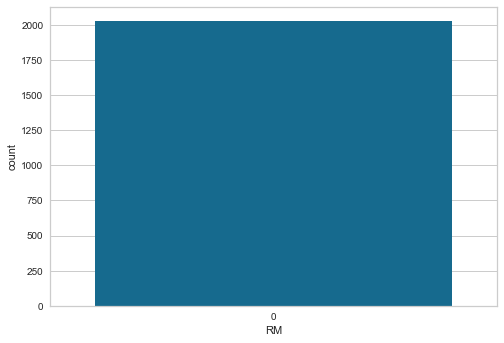

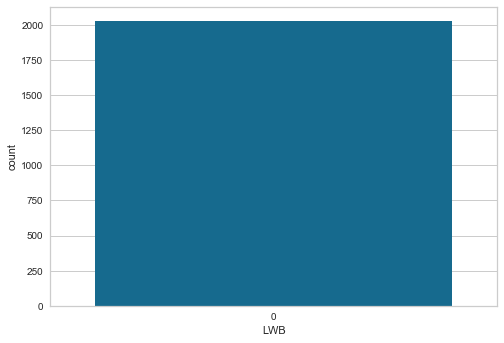

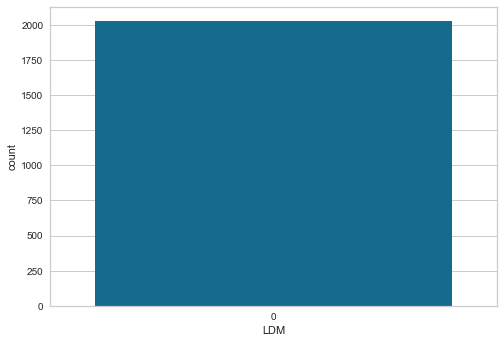

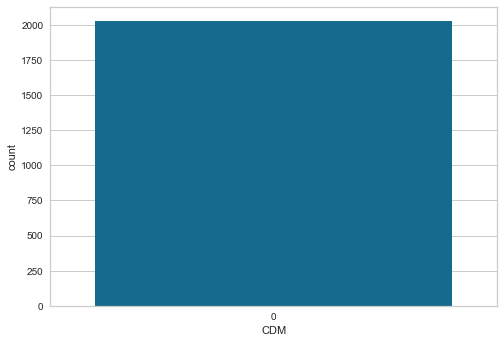

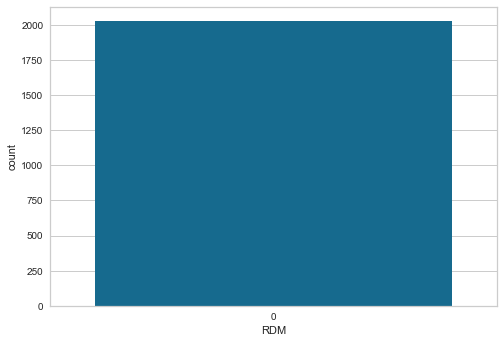

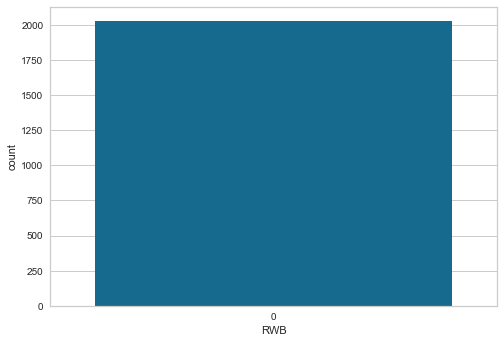

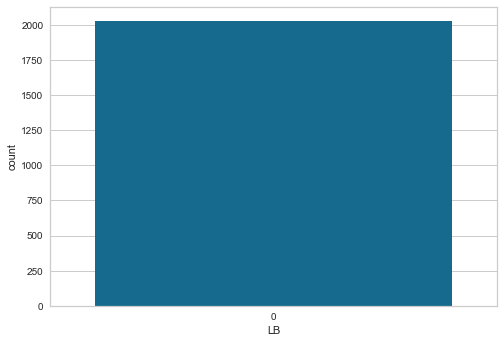

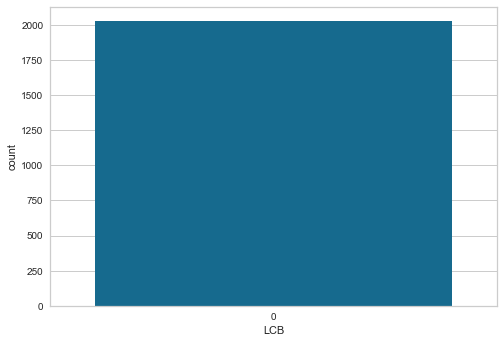

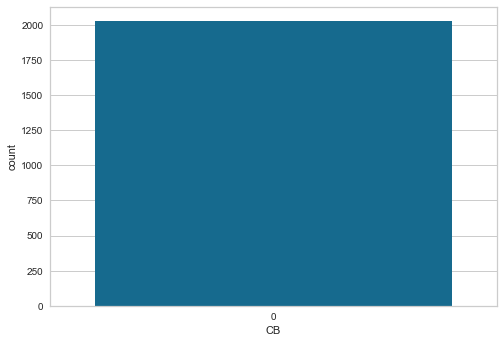

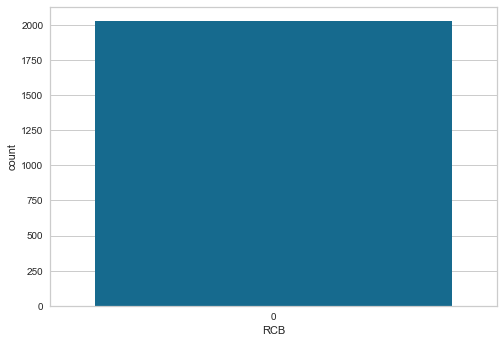

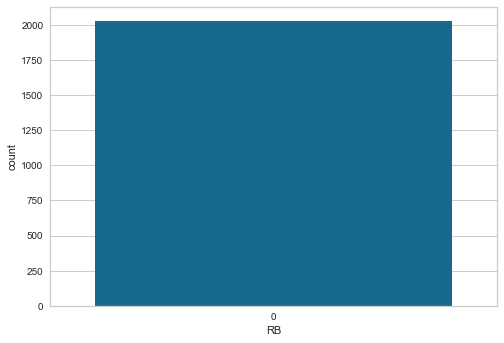

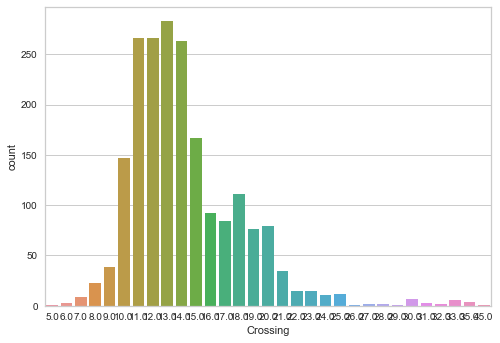

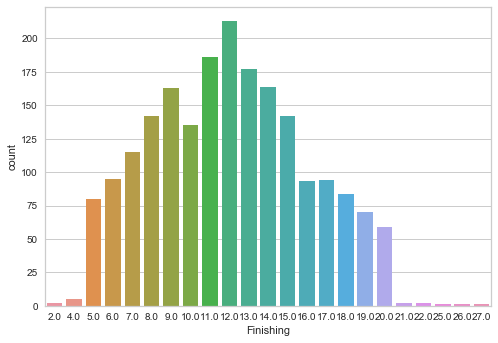

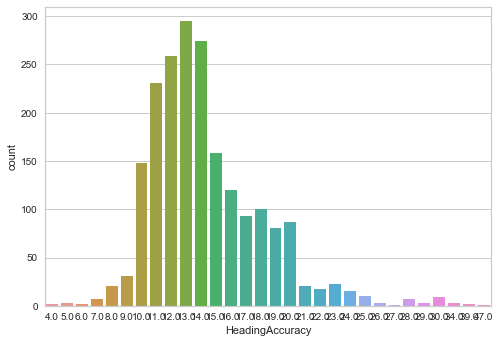

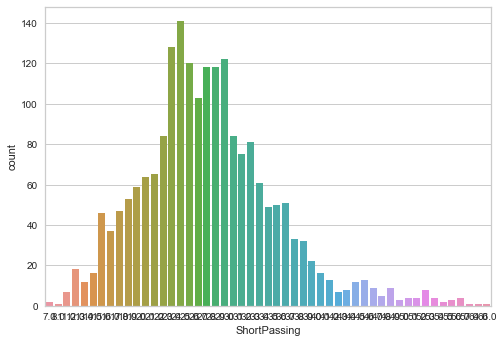

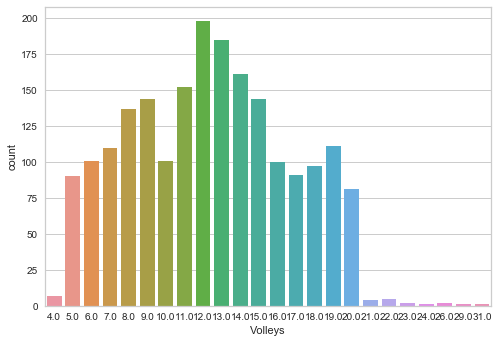

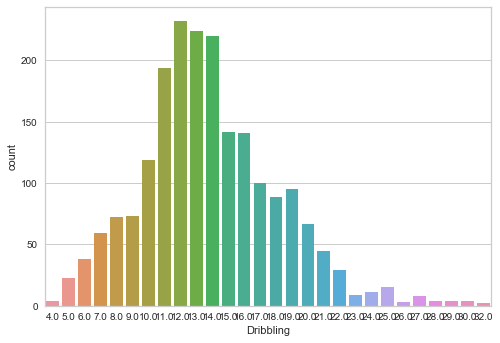

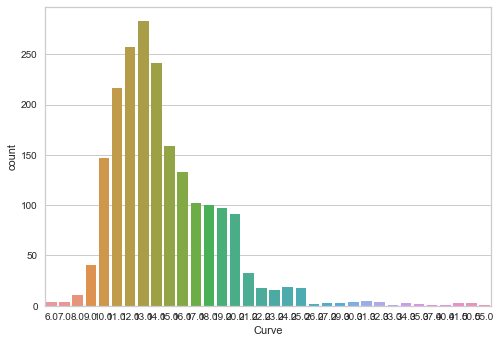

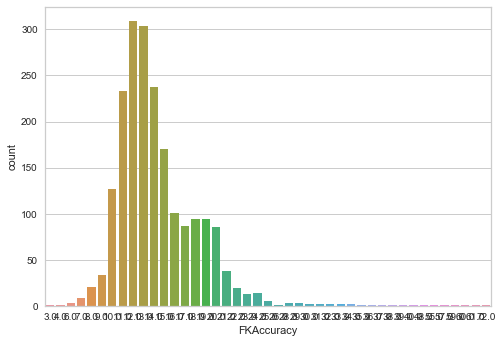

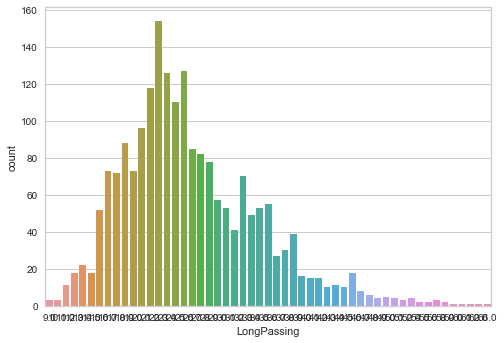

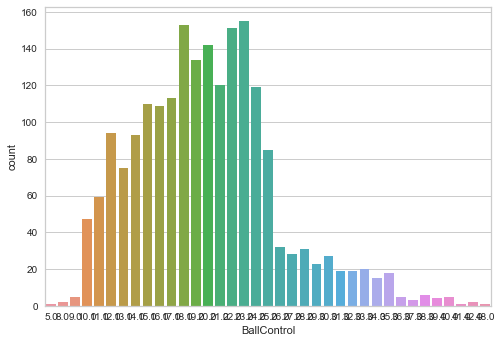

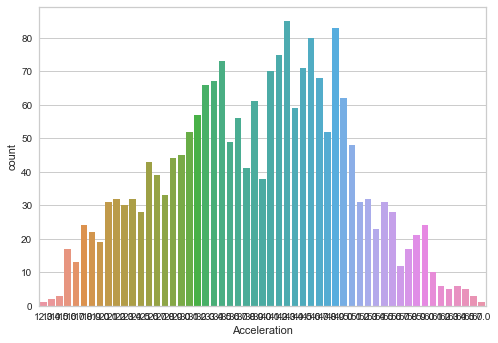

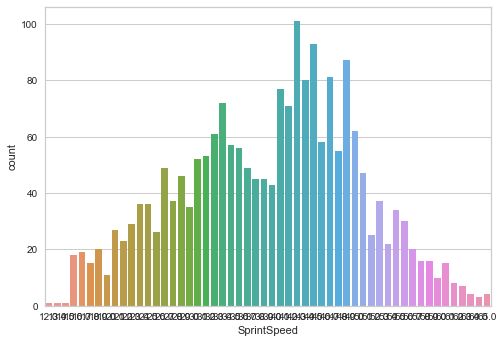

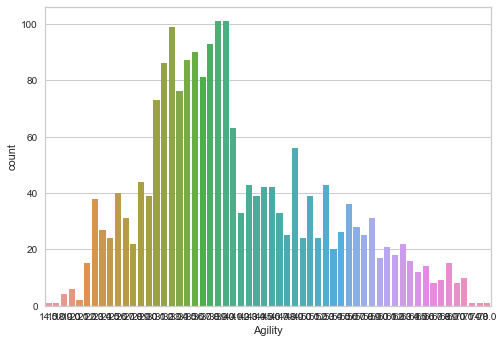

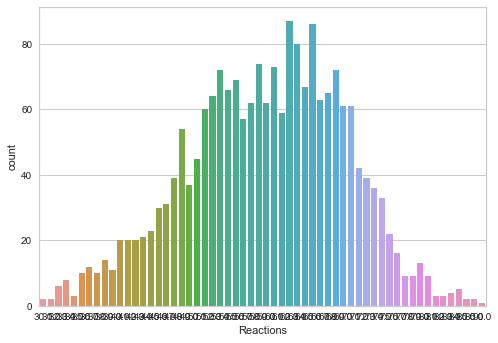

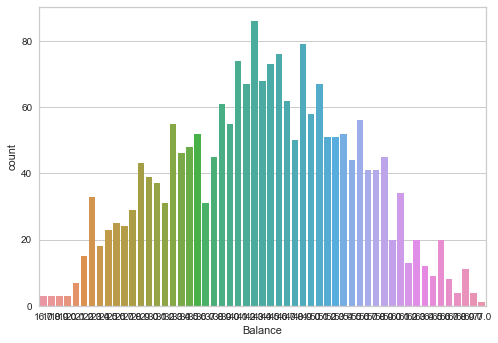

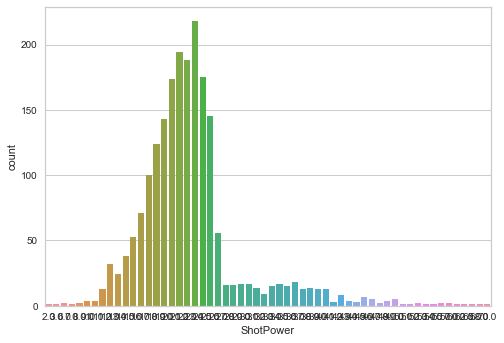

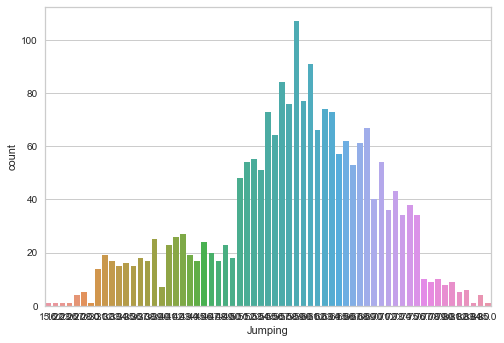

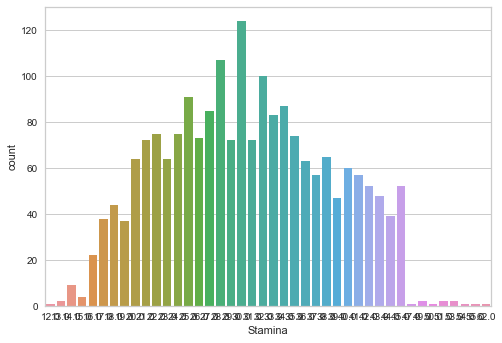

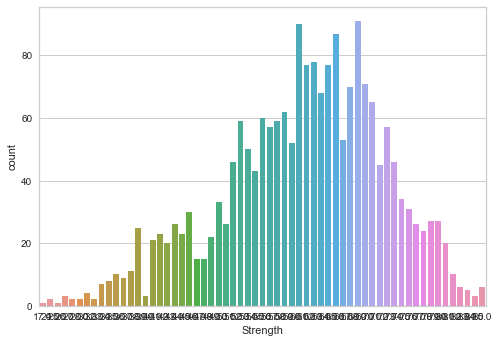

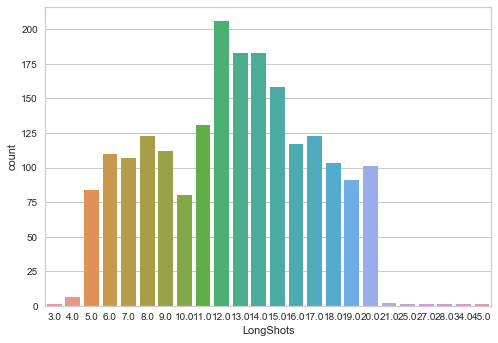

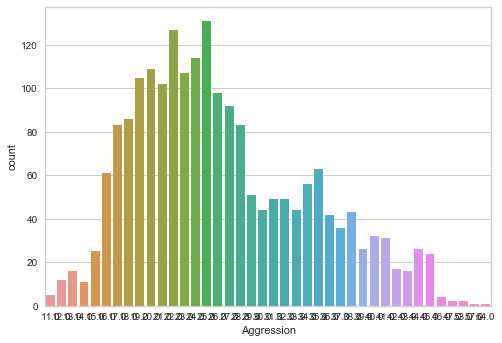

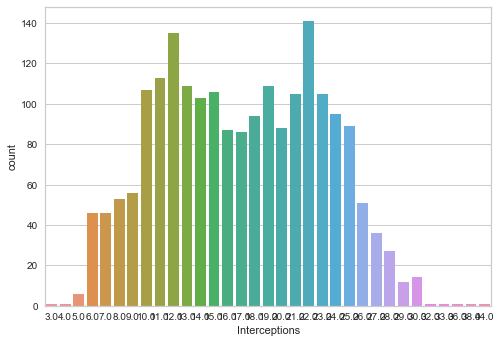

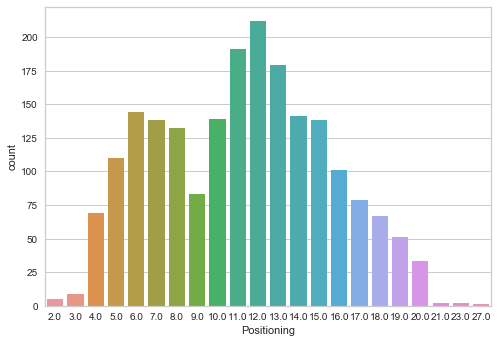

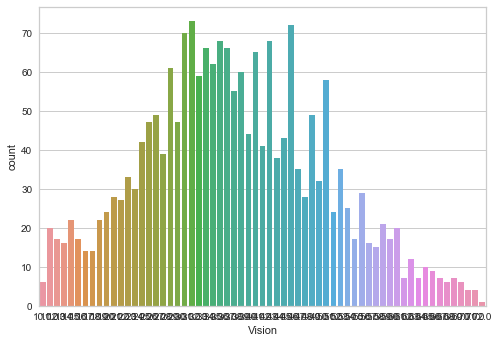

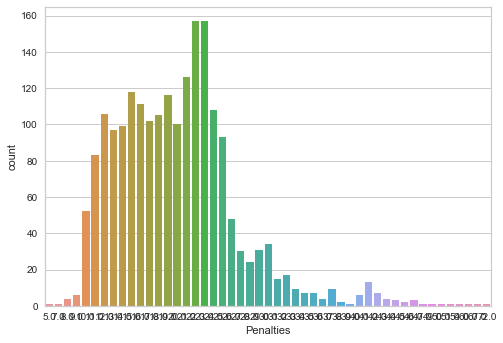

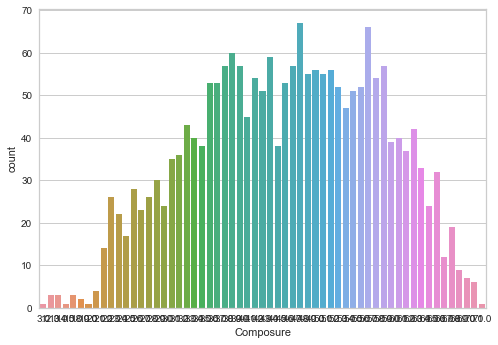

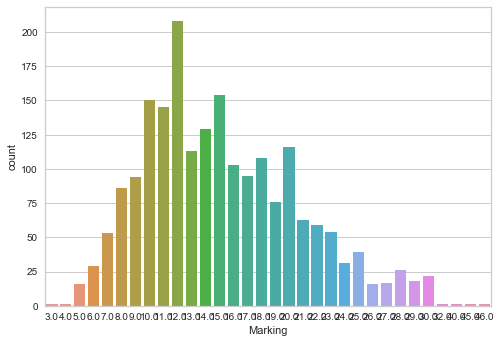

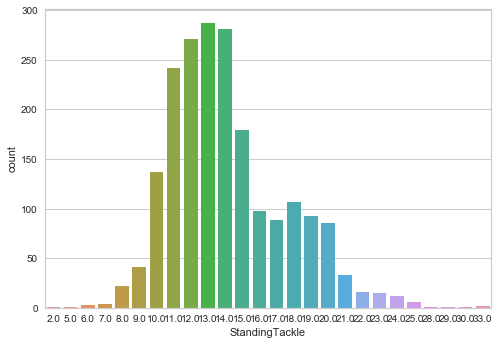

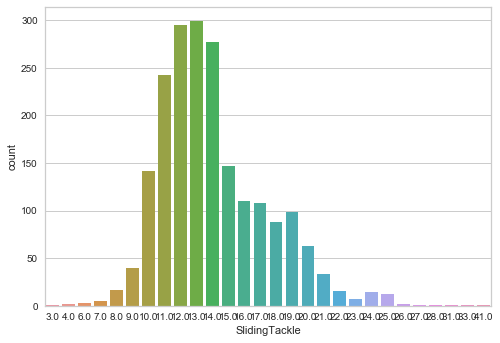

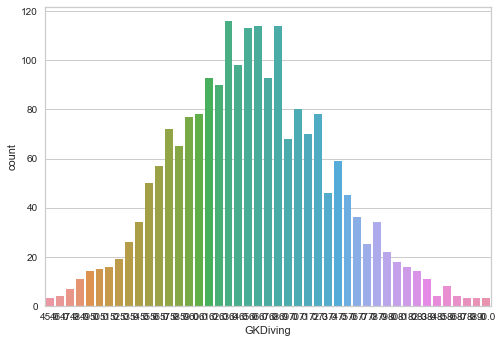

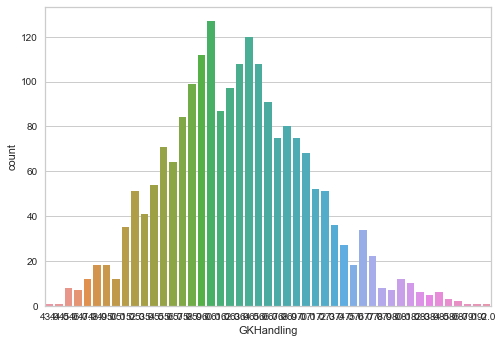

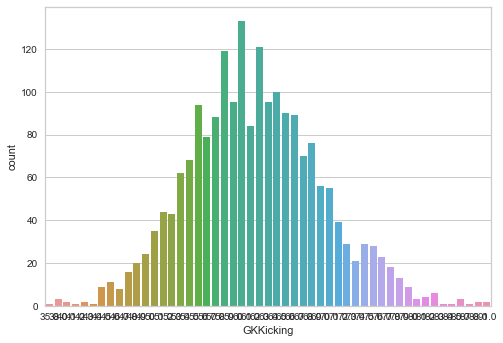

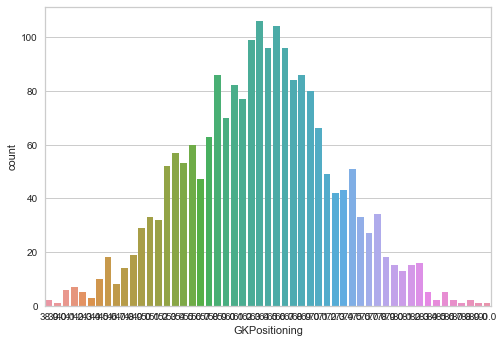

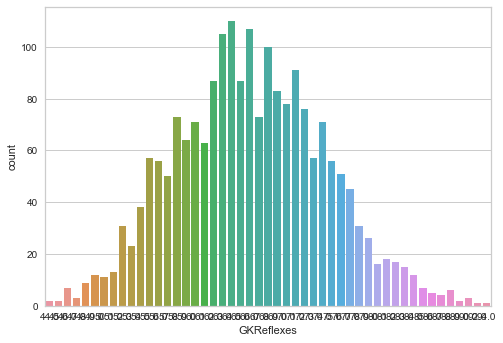

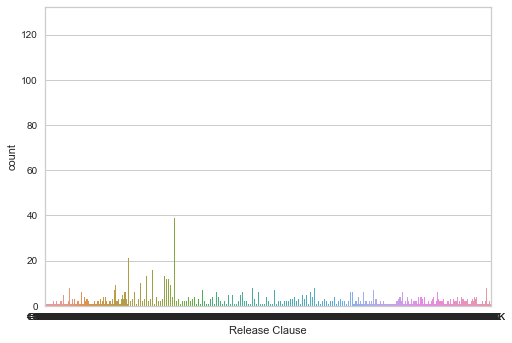

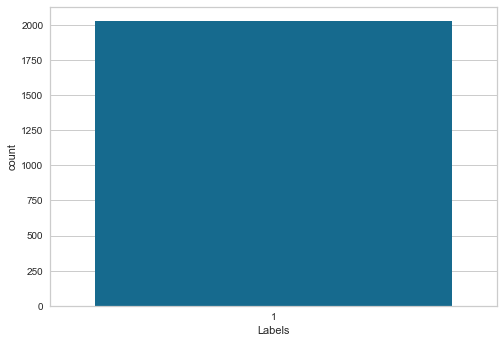

In [51]:
for column in b.columns:
    sns.countplot(b[column])
    plt.show()

#### 4.3.1 Group 2

In [52]:
c=fifa[fifa['Labels']==2].drop(columns=['ID','Photo','Flag','Club','Club Logo'])

In [53]:
pd.set_option('display.max_columns',999)

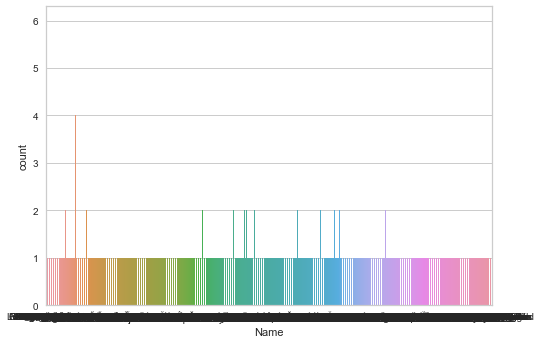

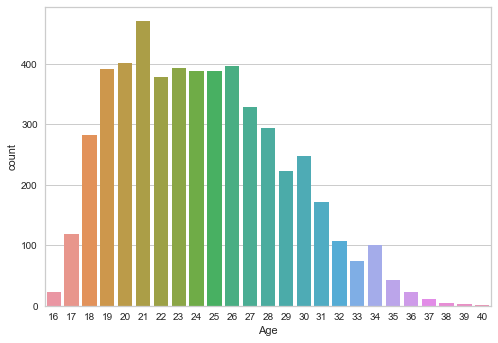

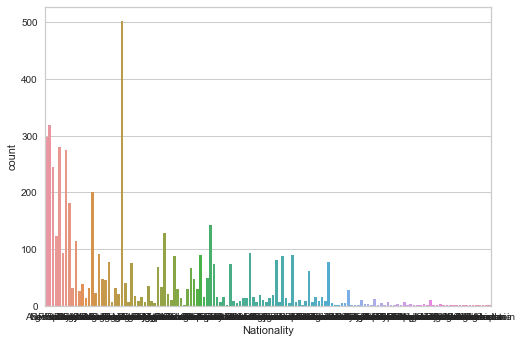

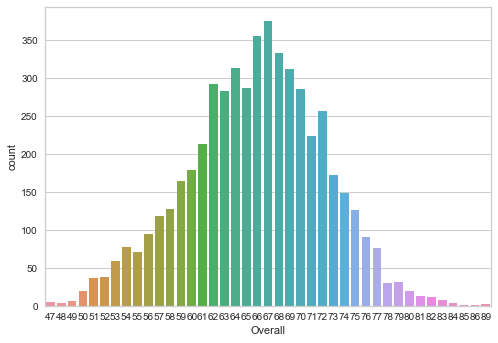

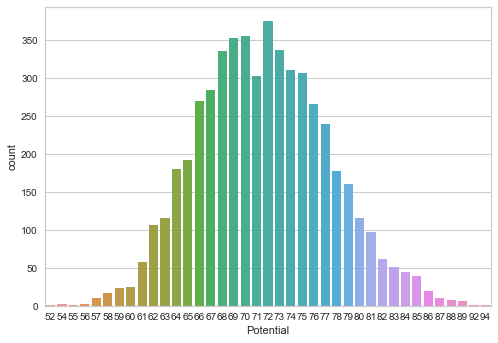

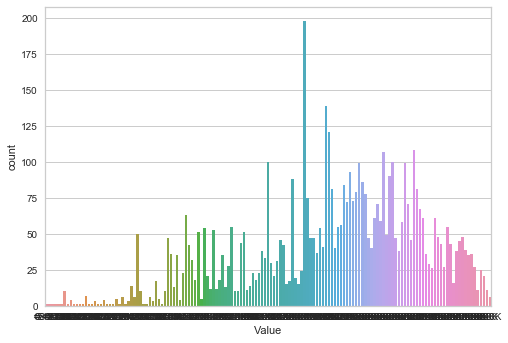

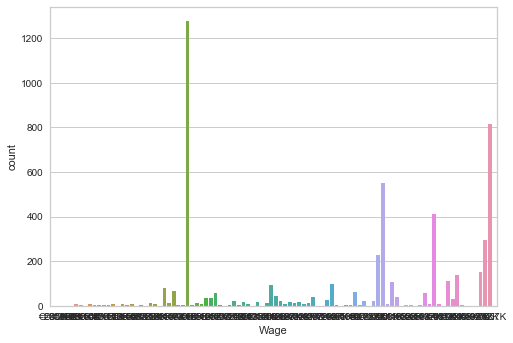

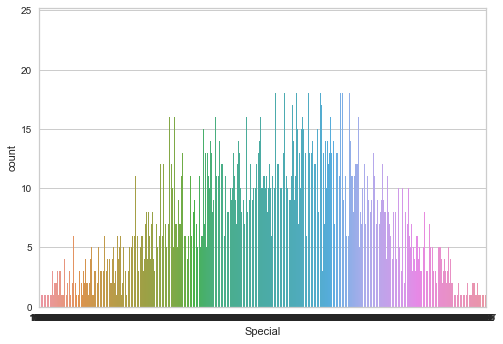

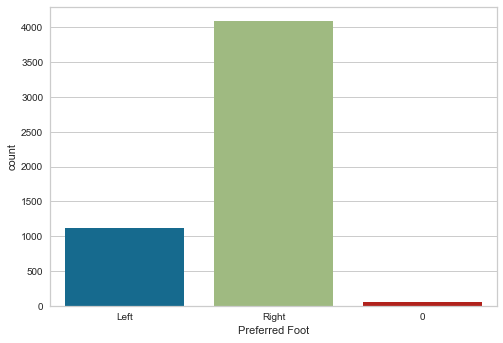

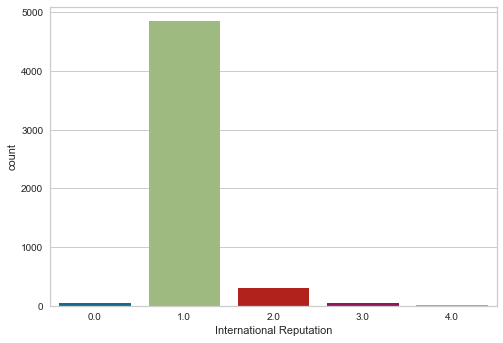

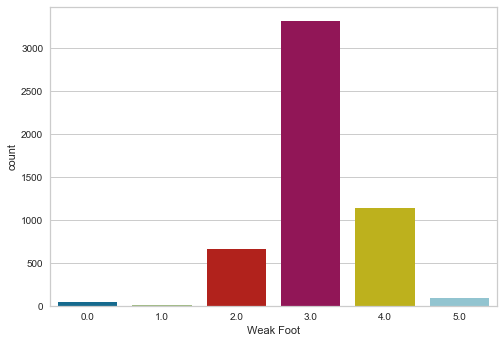

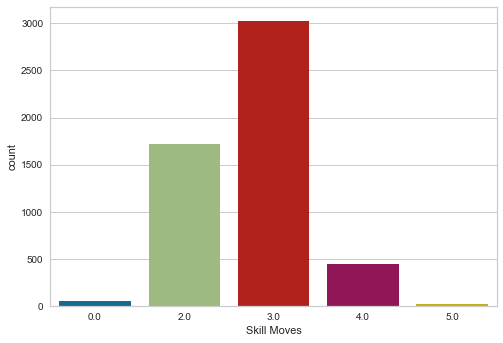

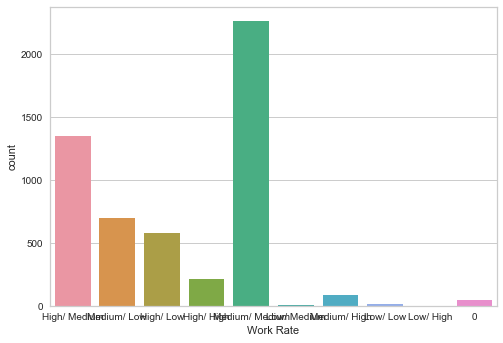

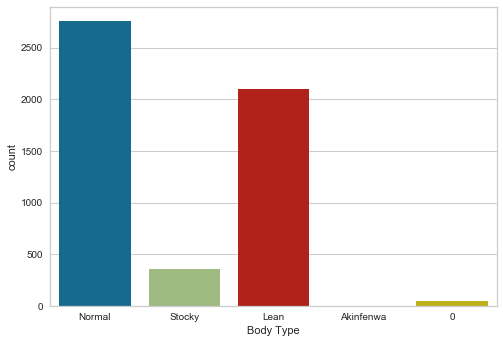

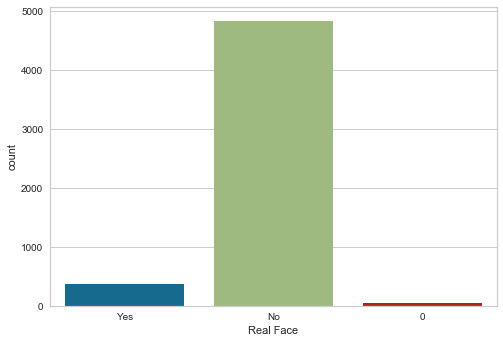

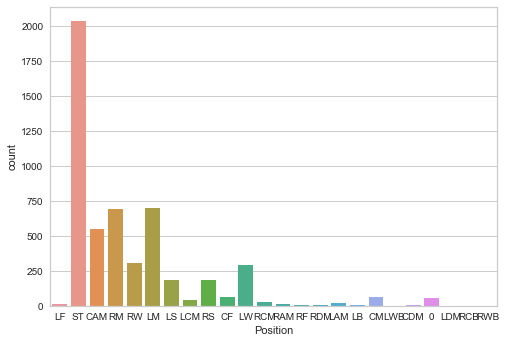

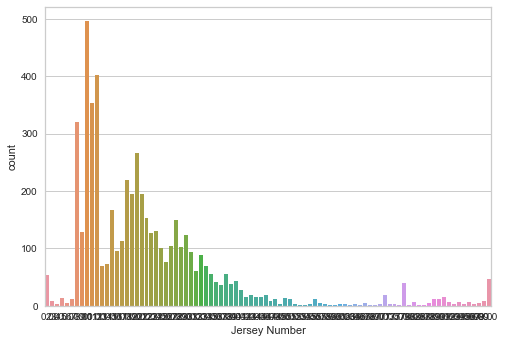

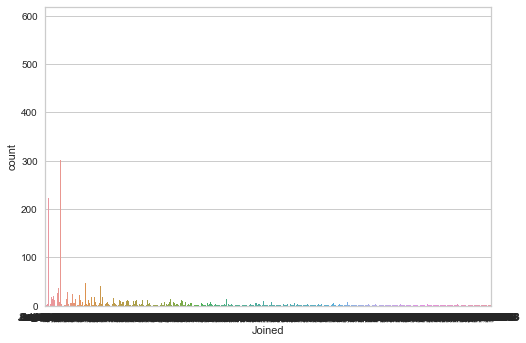

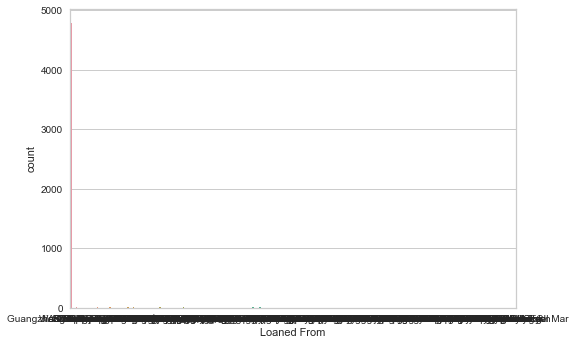

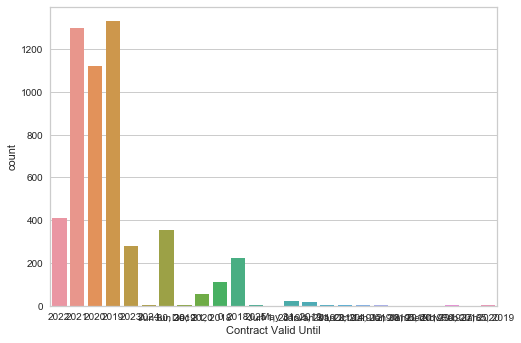

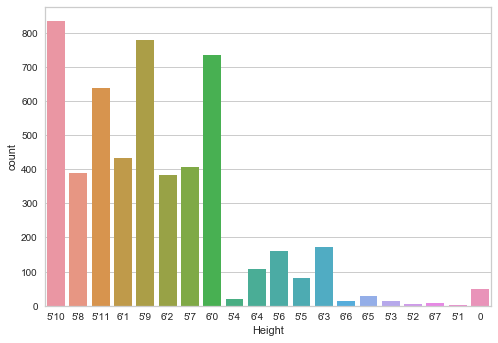

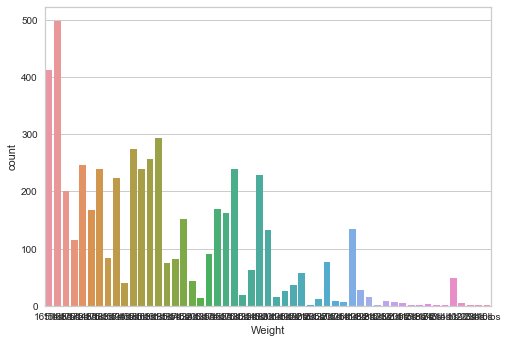

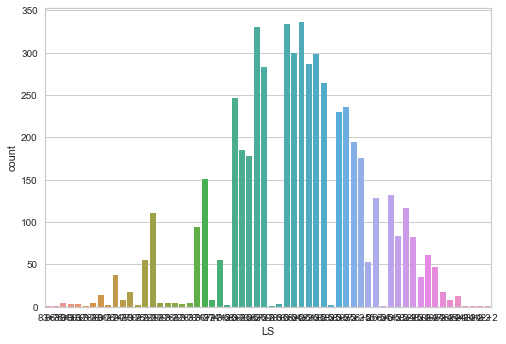

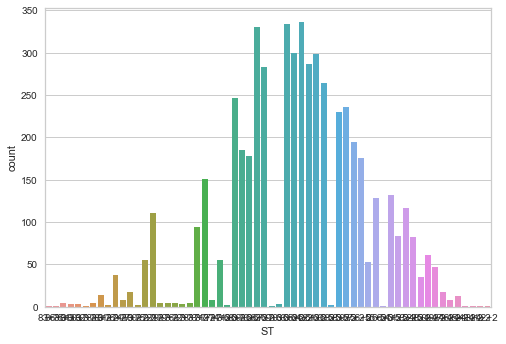

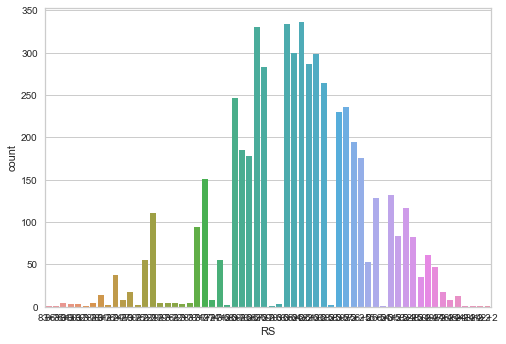

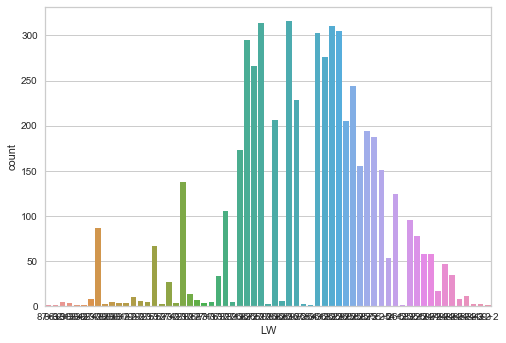

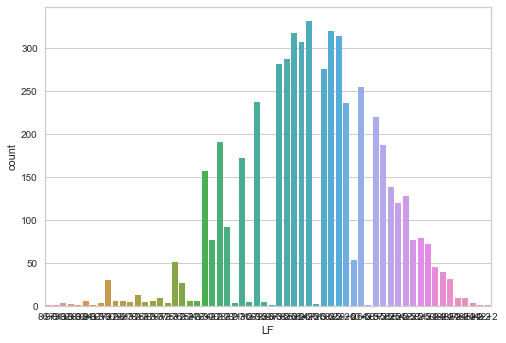

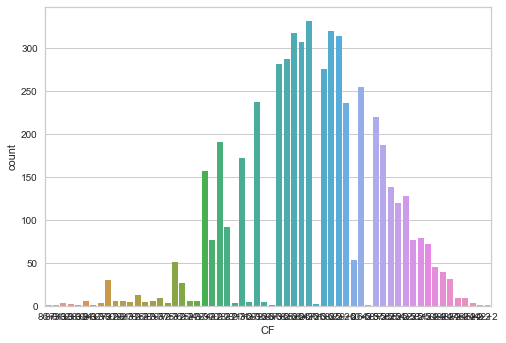

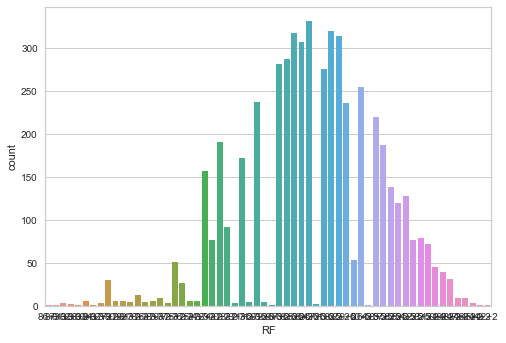

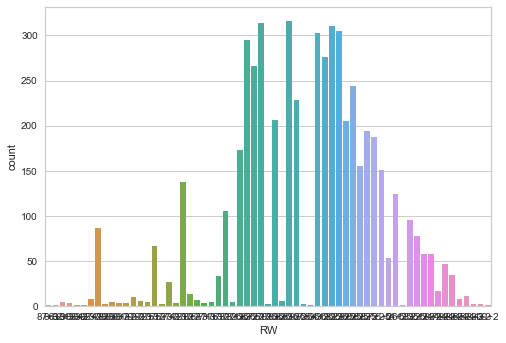

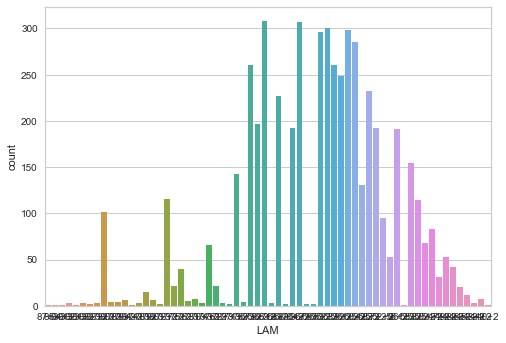

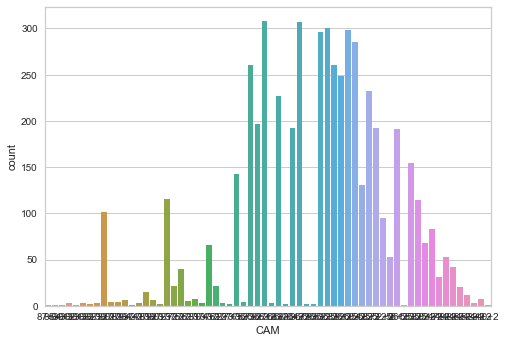

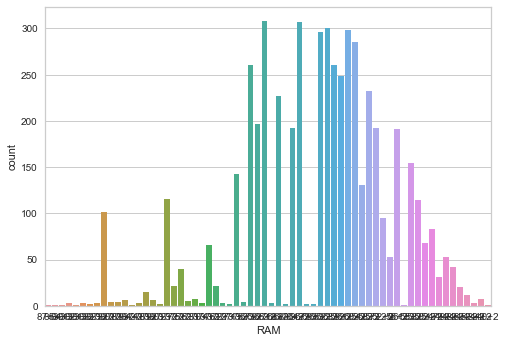

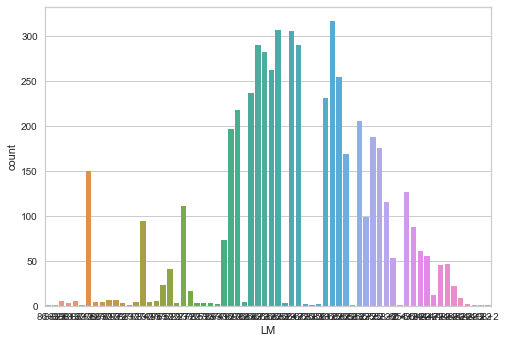

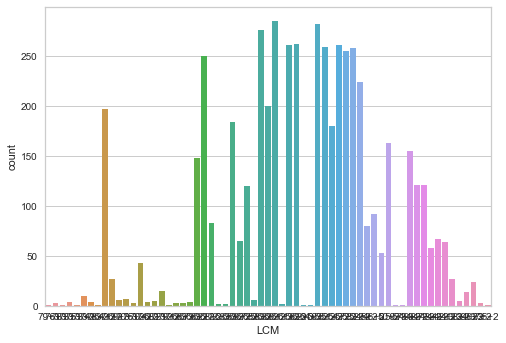

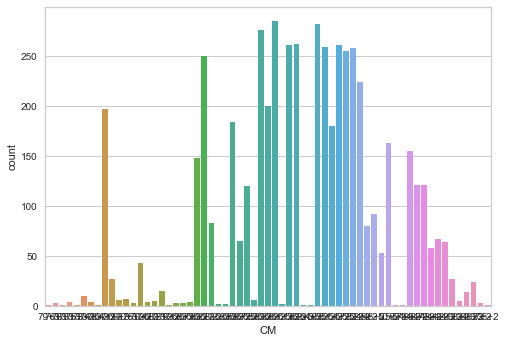

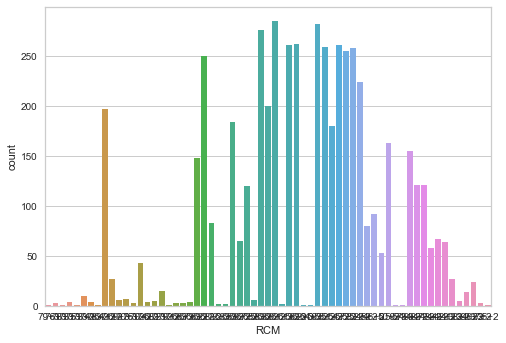

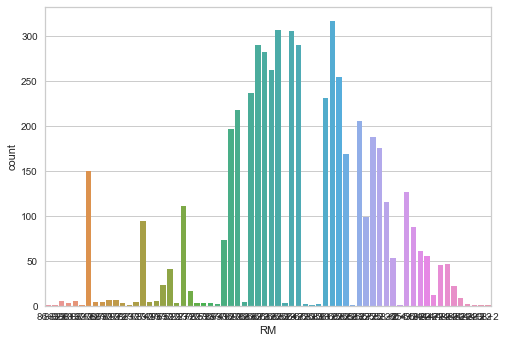

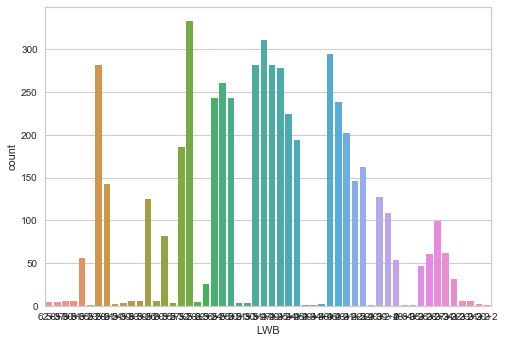

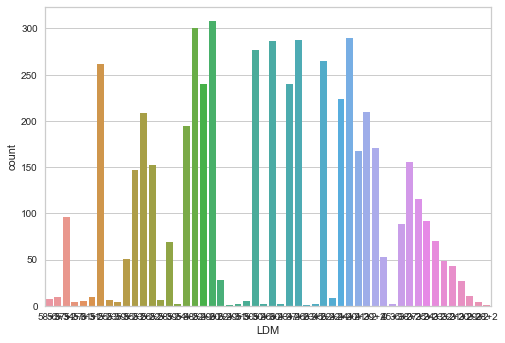

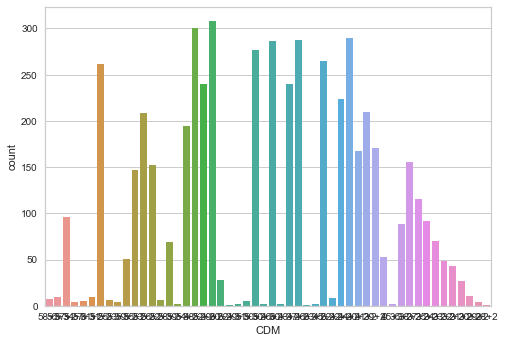

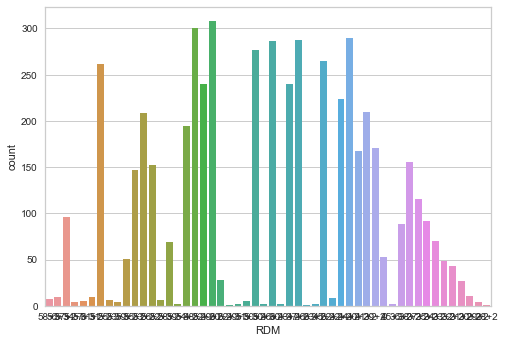

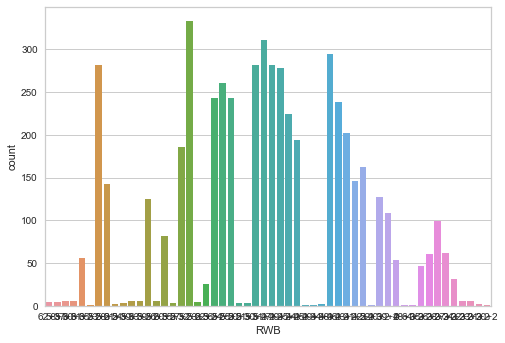

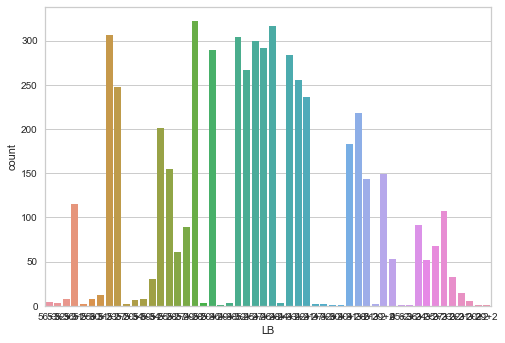

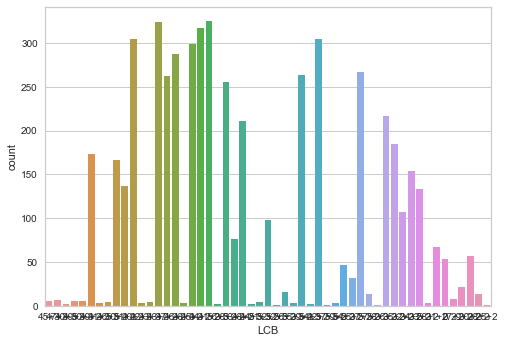

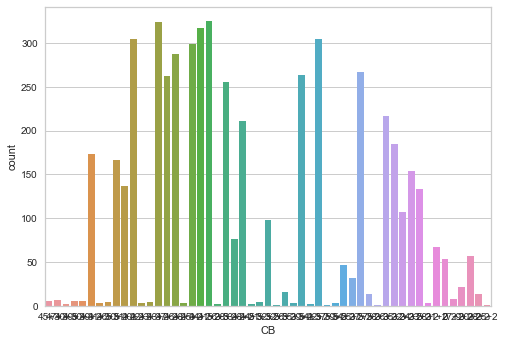

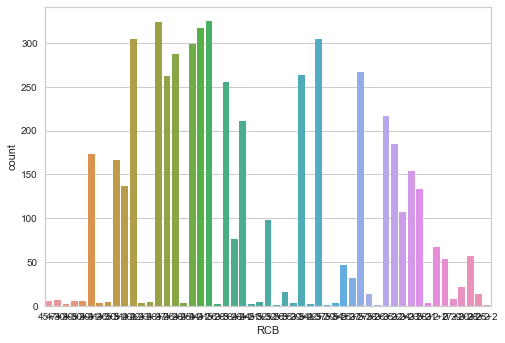

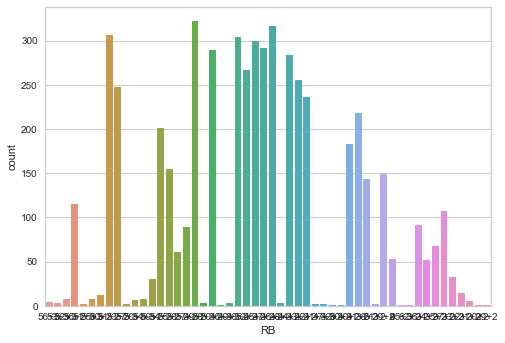

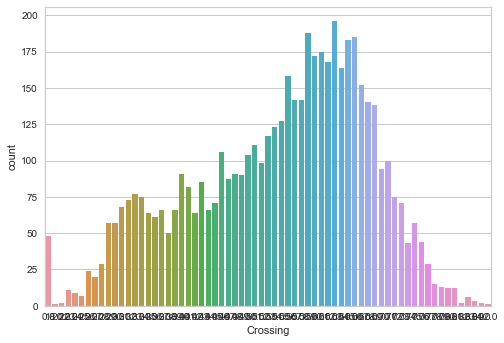

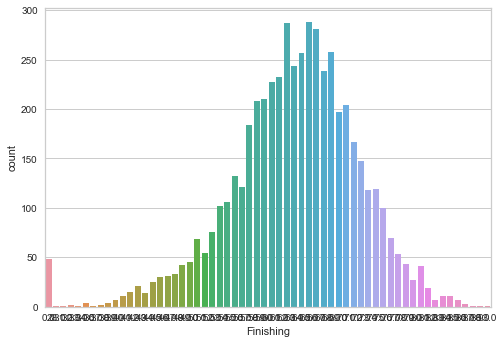

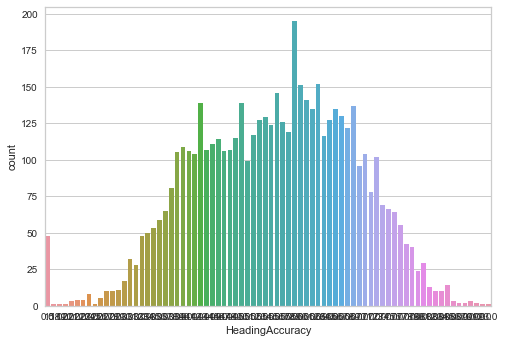

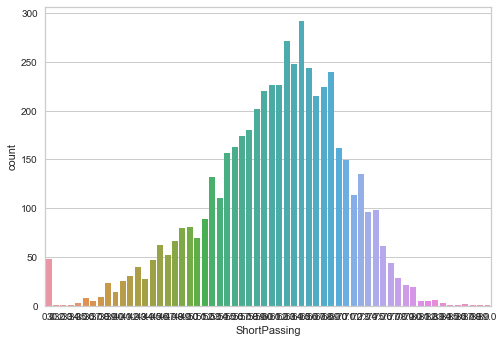

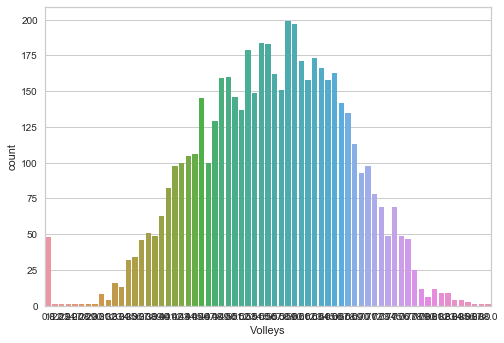

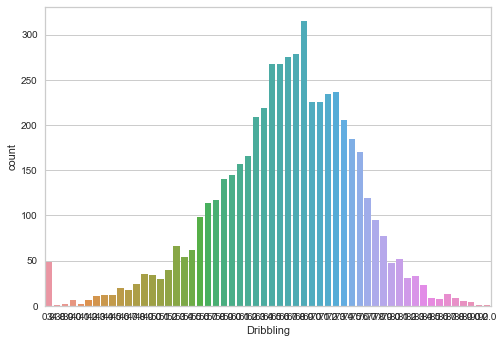

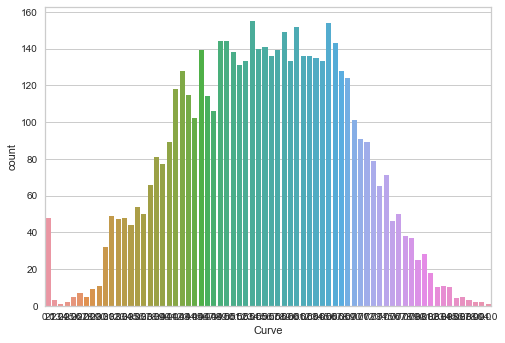

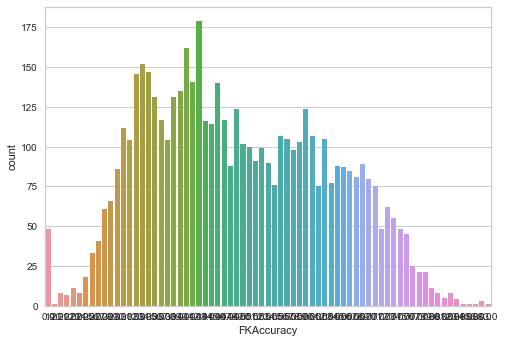

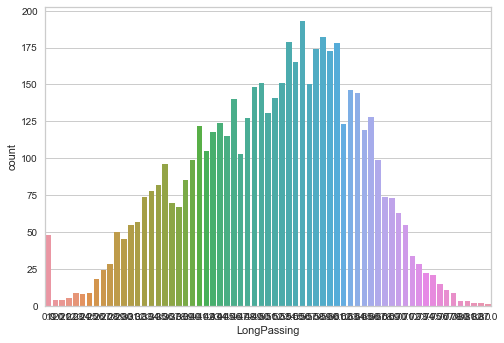

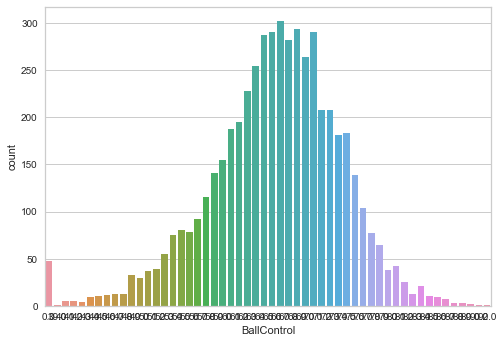

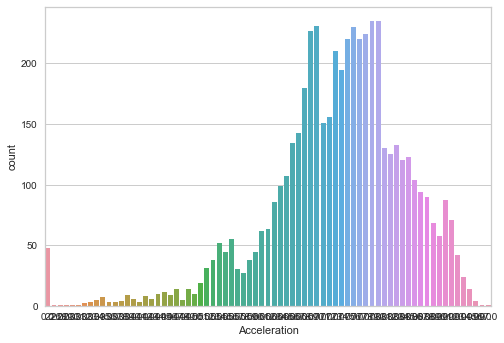

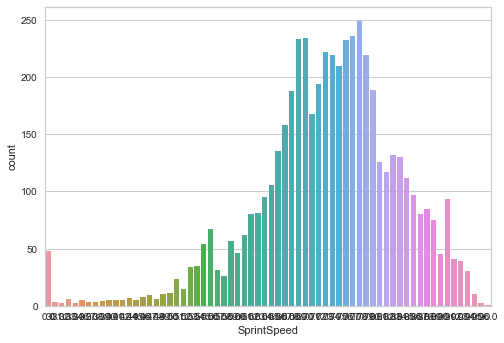

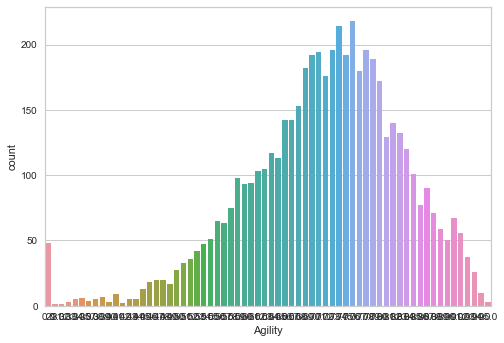

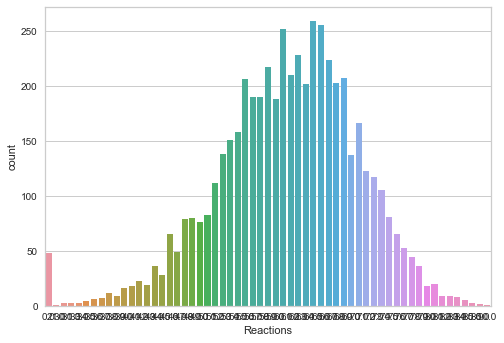

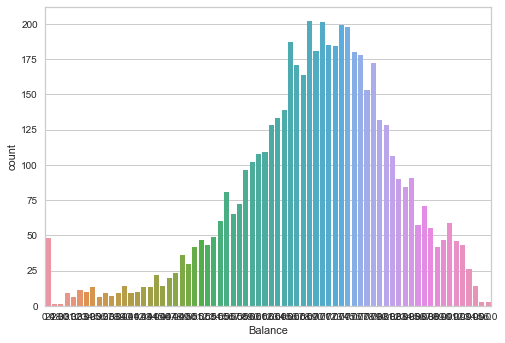

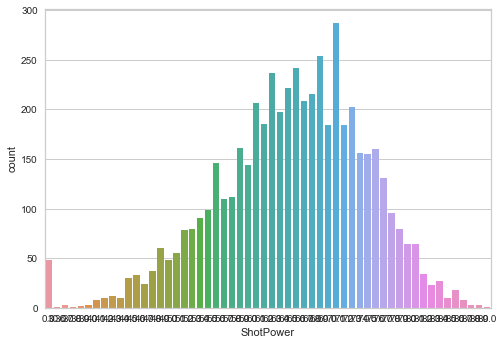

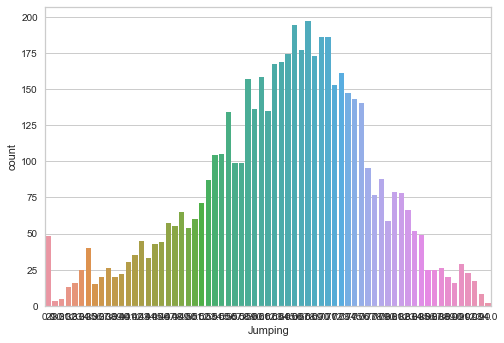

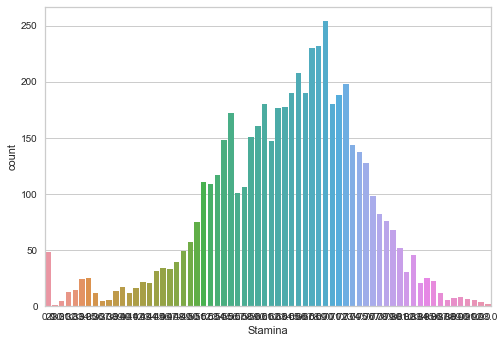

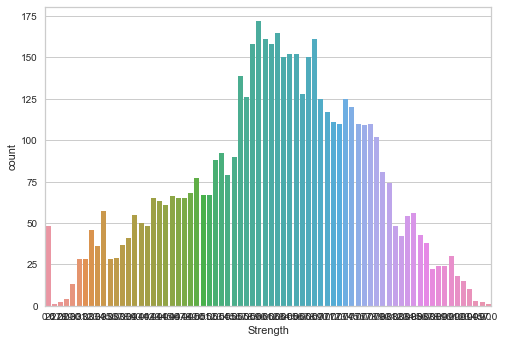

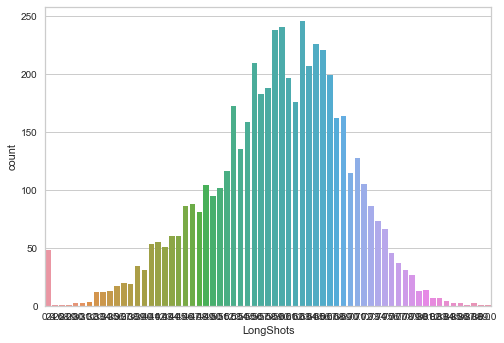

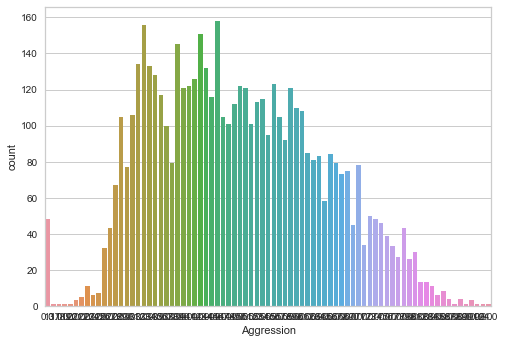

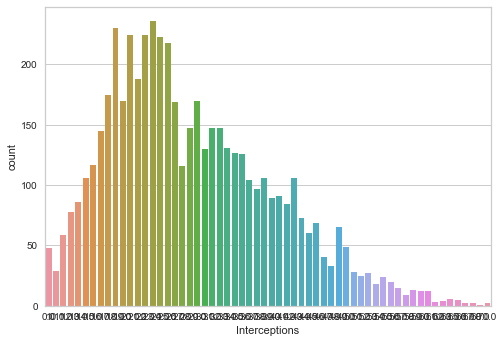

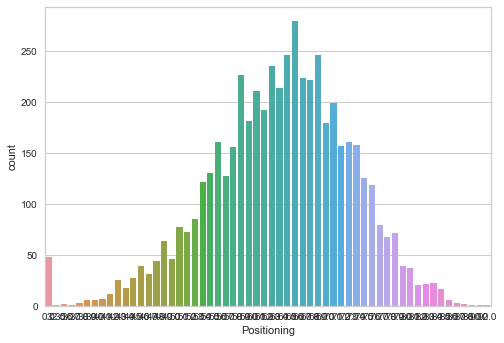

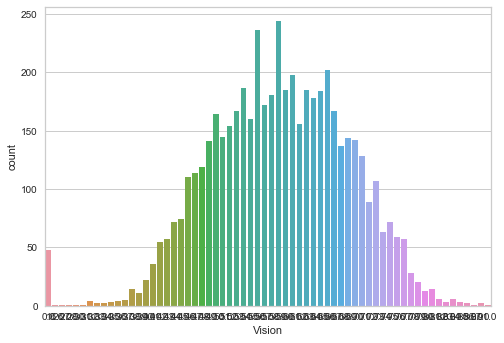

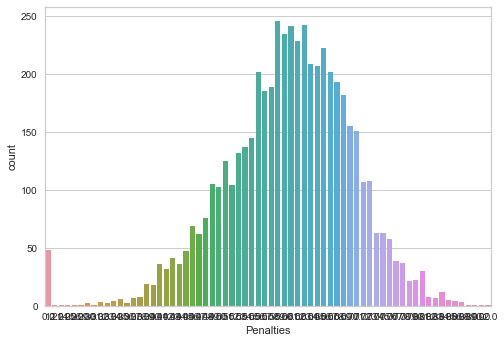

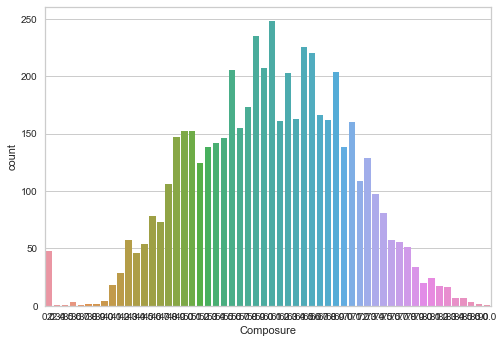

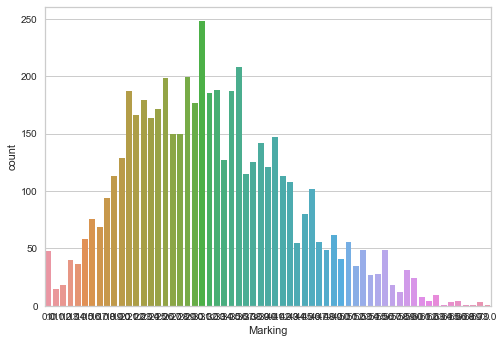

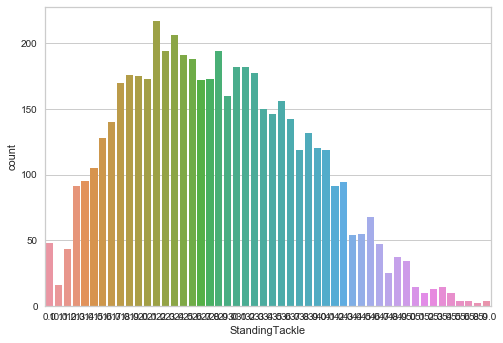

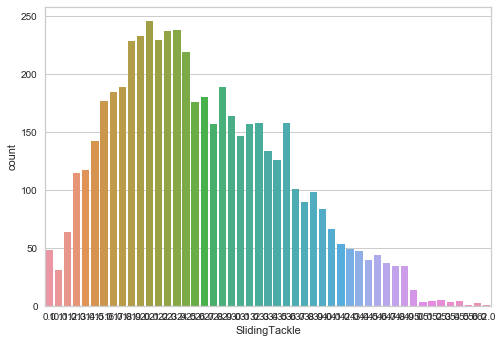

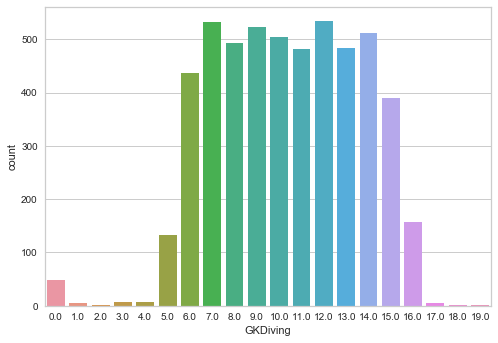

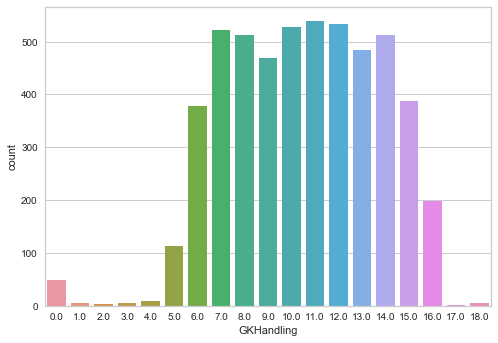

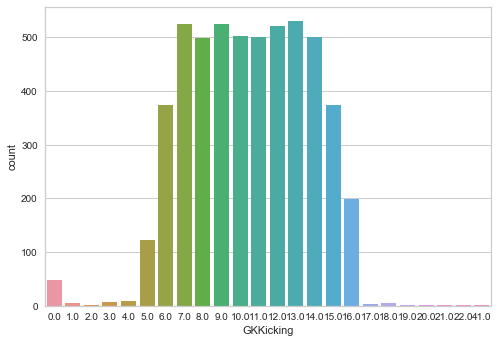

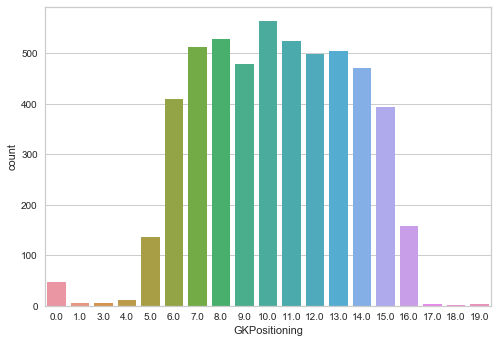

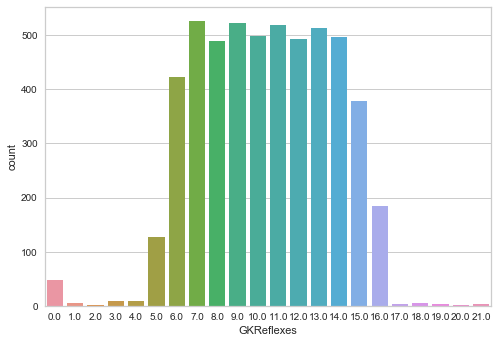

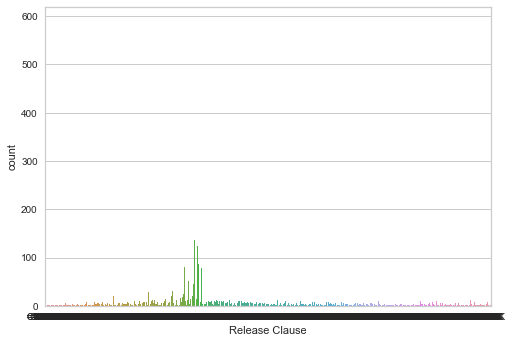

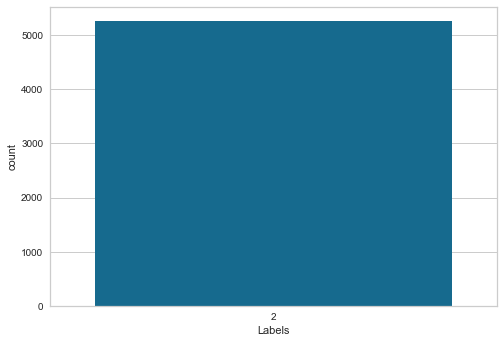

In [54]:
for column in c.columns:
    sns.countplot(c[column])
    plt.show()

#### 4.3.1 Group 3

In [55]:
d=fifa[fifa['Labels']==3].drop(columns=['ID','Photo','Flag','Club','Club Logo'])

In [56]:
pd.set_option('display.max_columns',999)

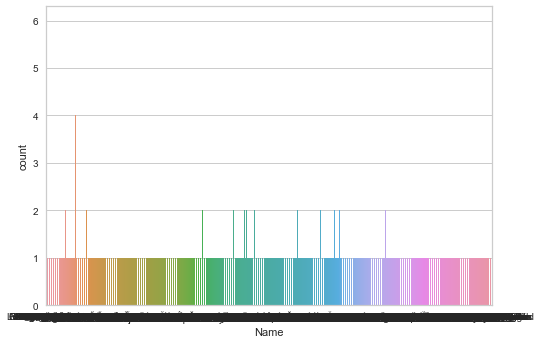

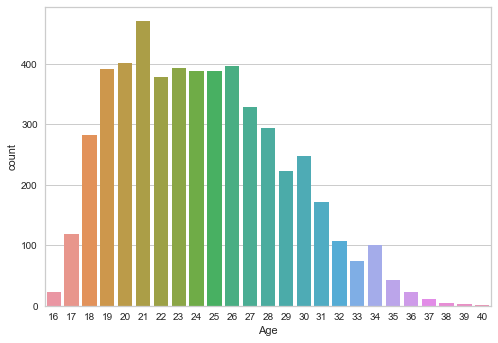

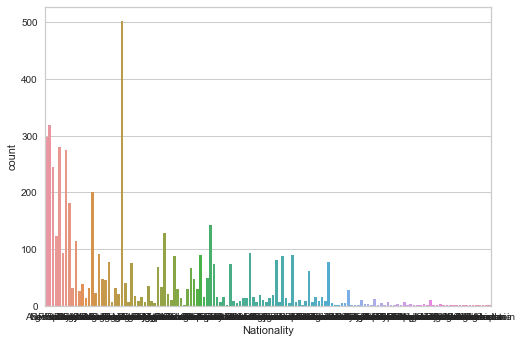

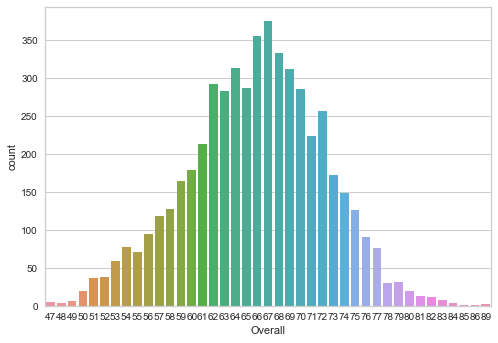

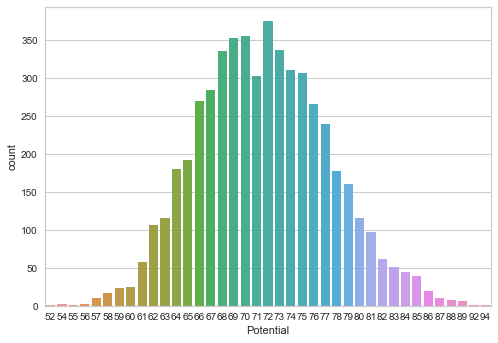

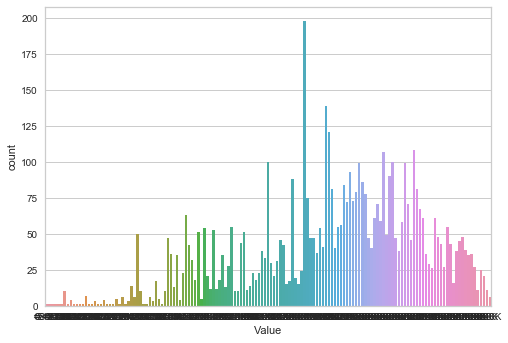

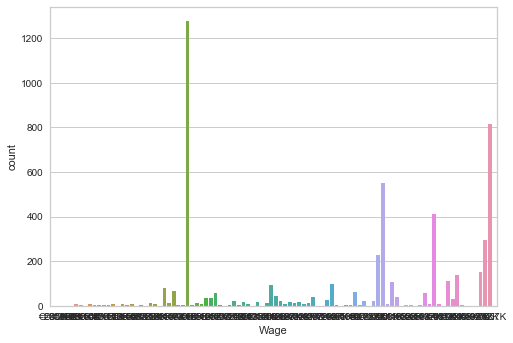

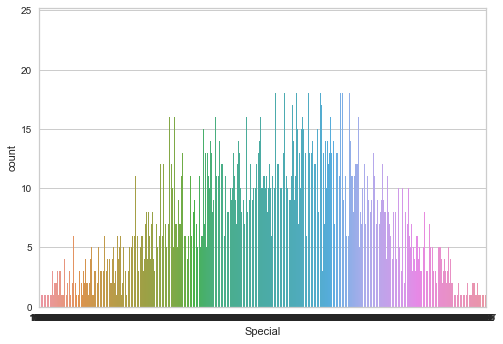

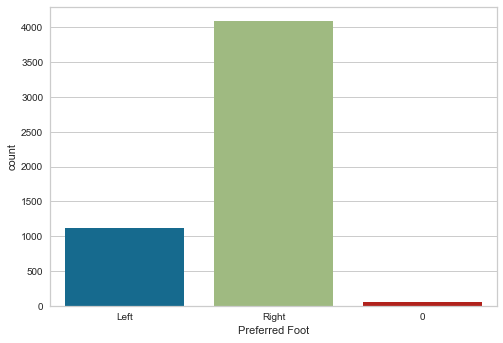

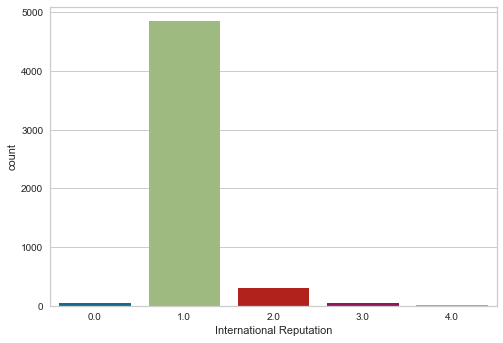

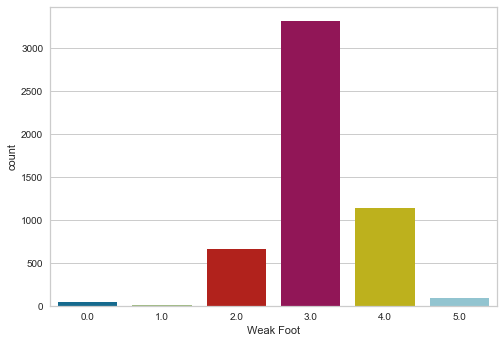

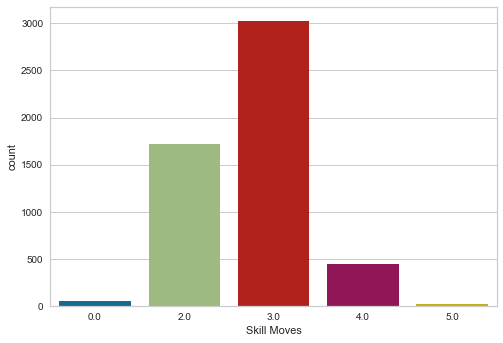

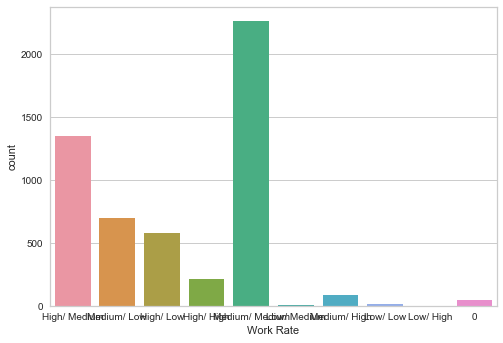

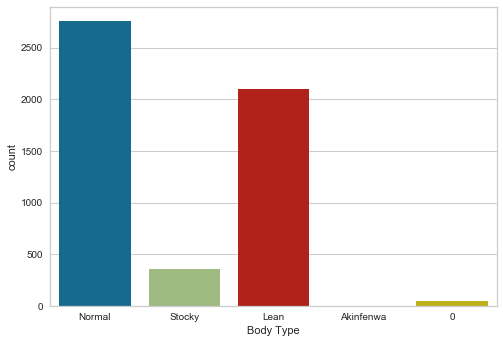

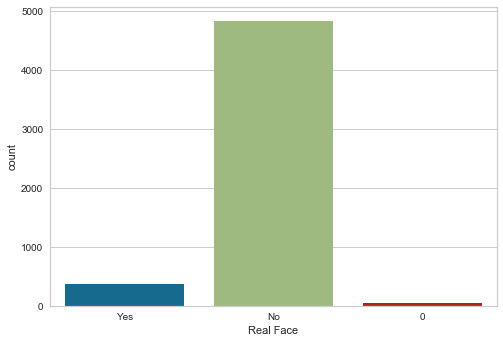

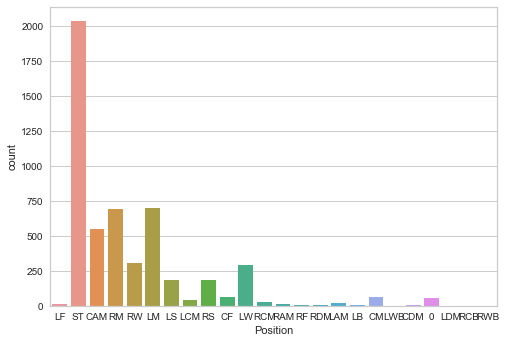

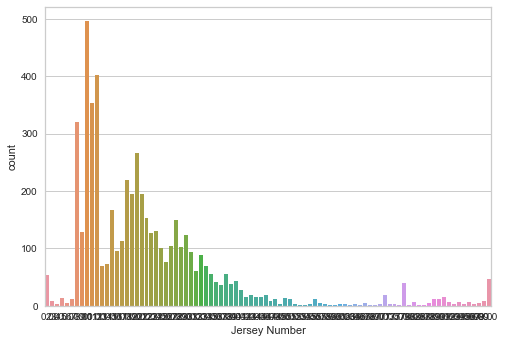

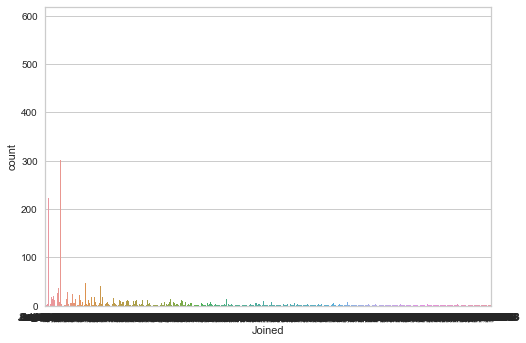

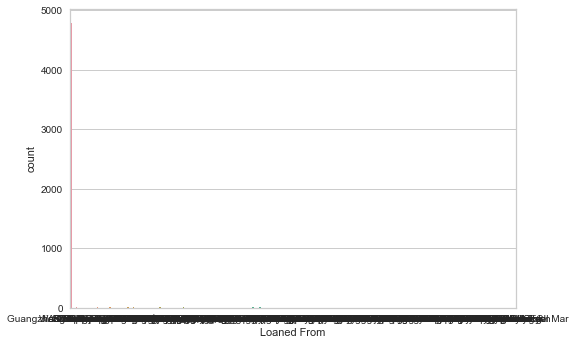

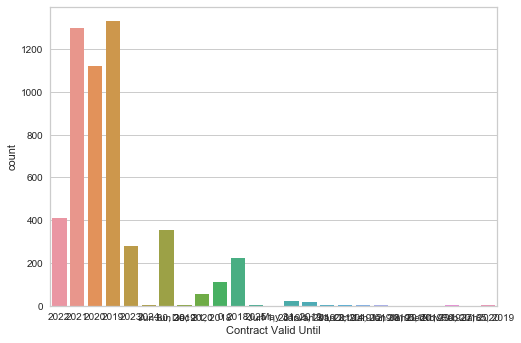

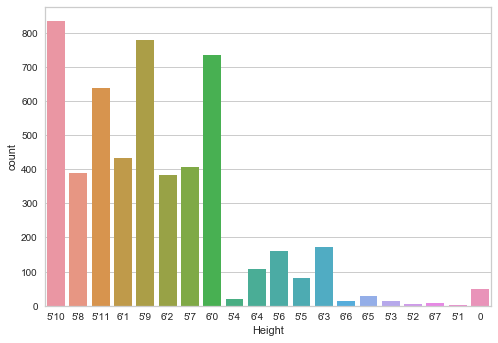

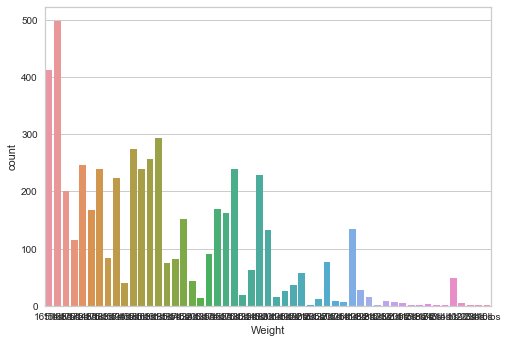

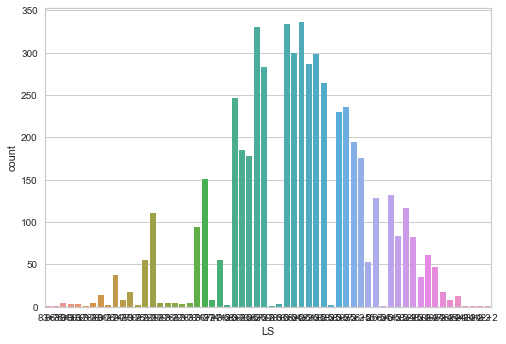

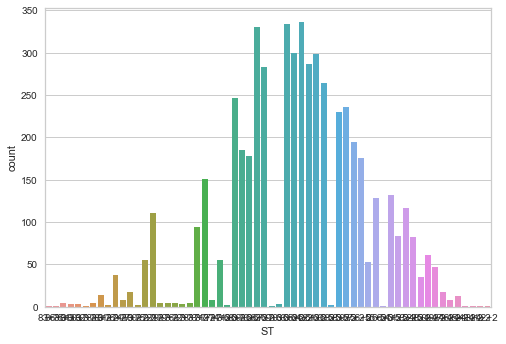

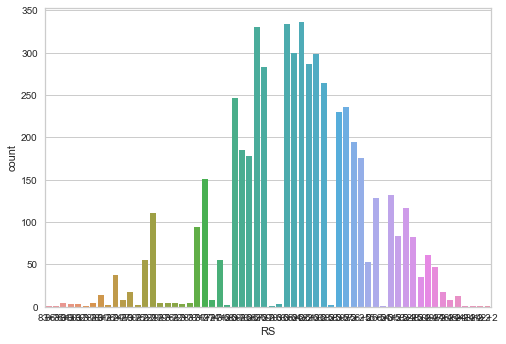

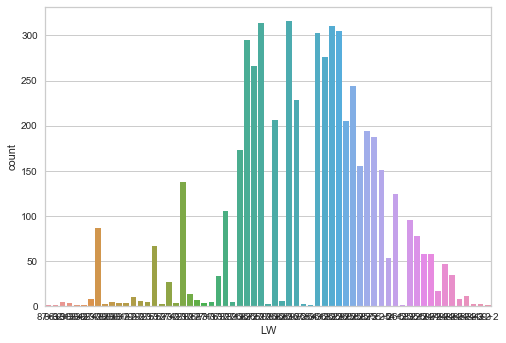

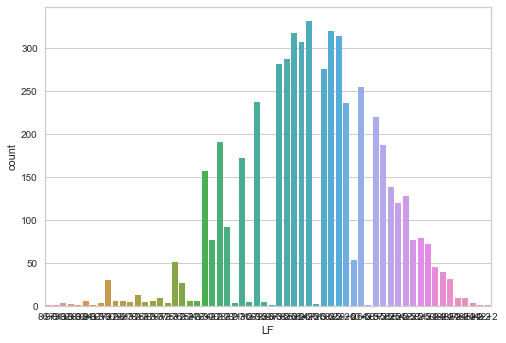

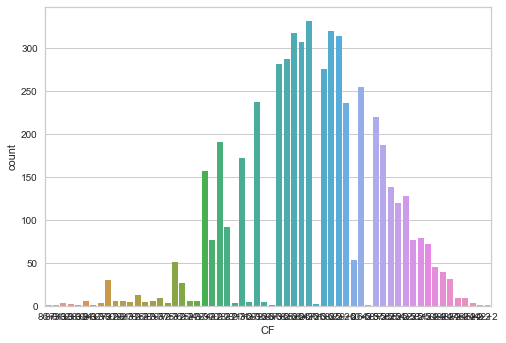

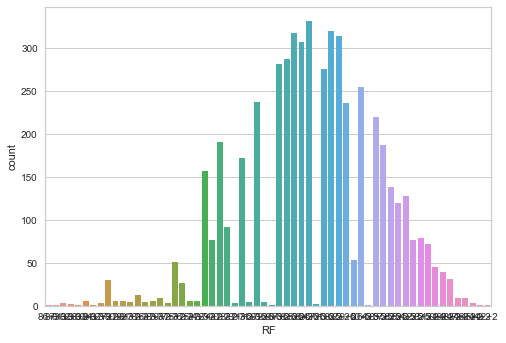

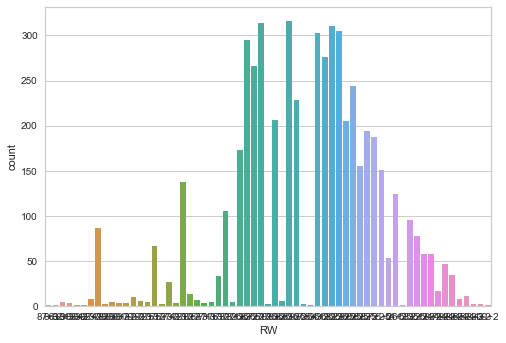

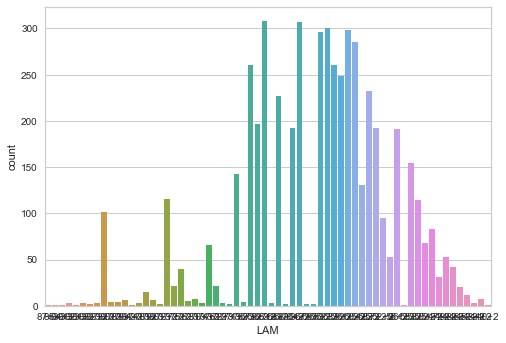

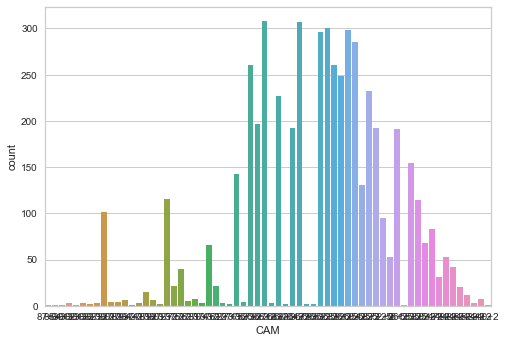

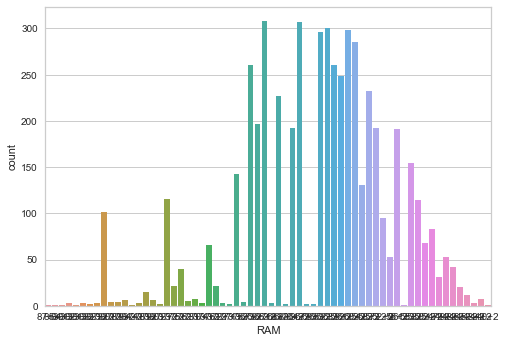

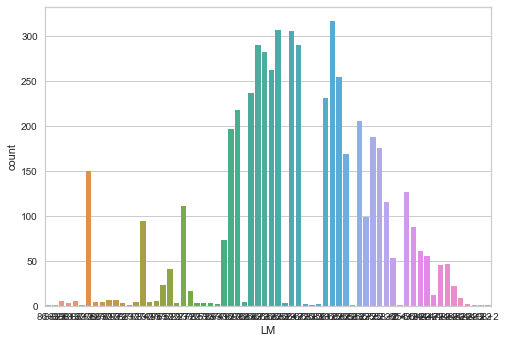

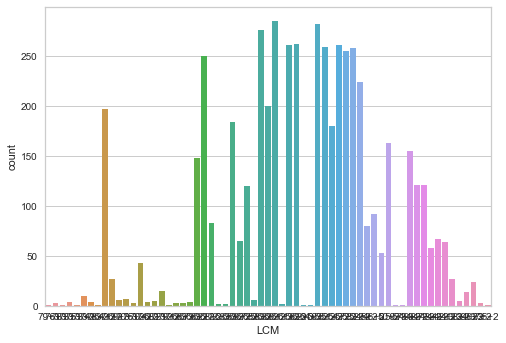

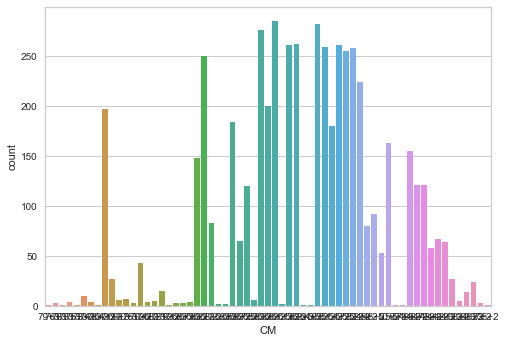

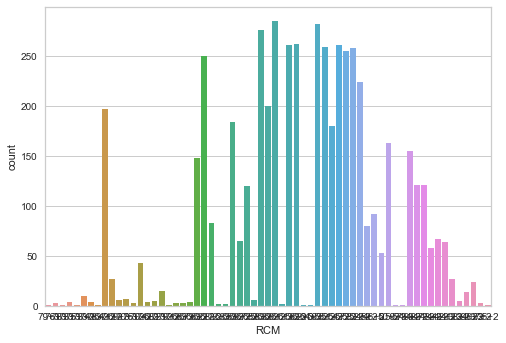

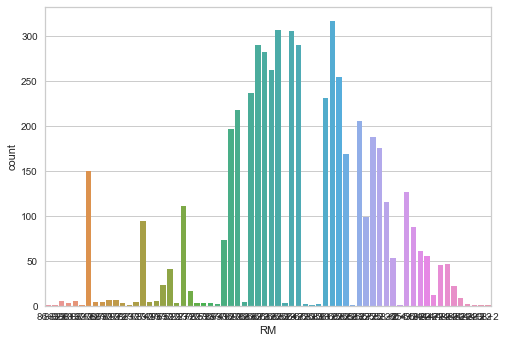

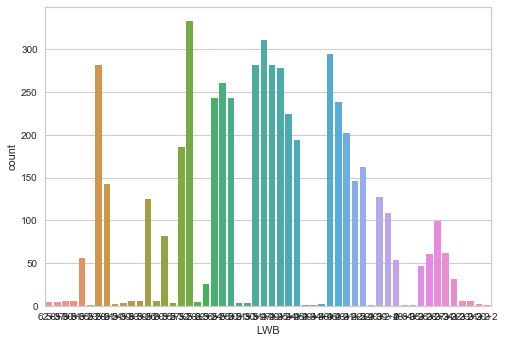

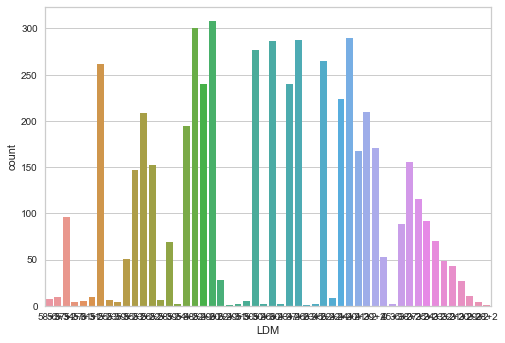

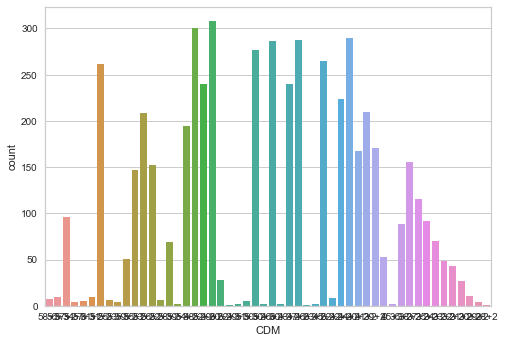

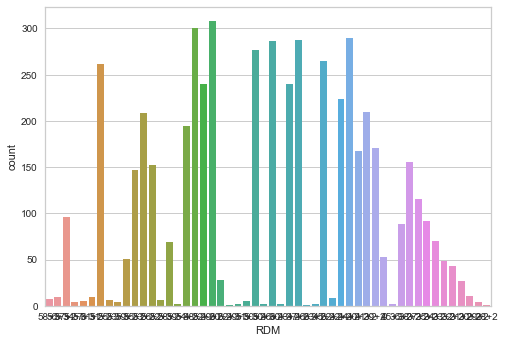

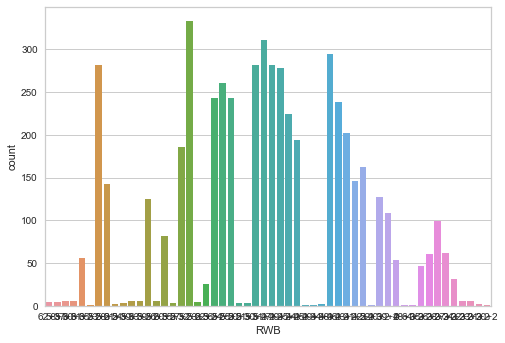

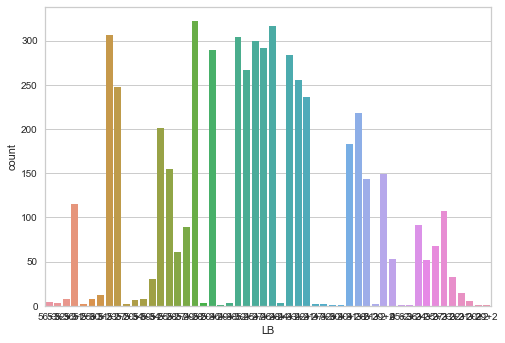

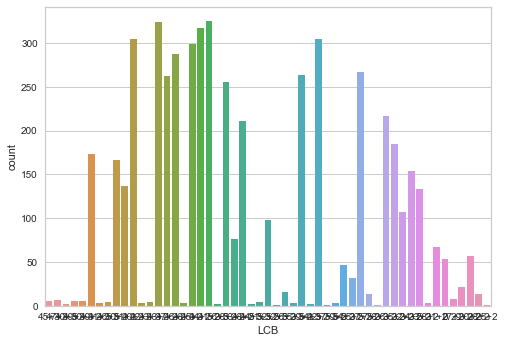

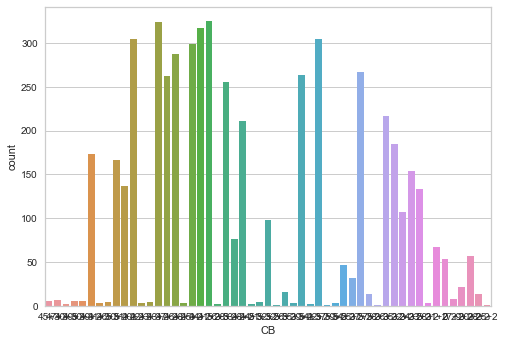

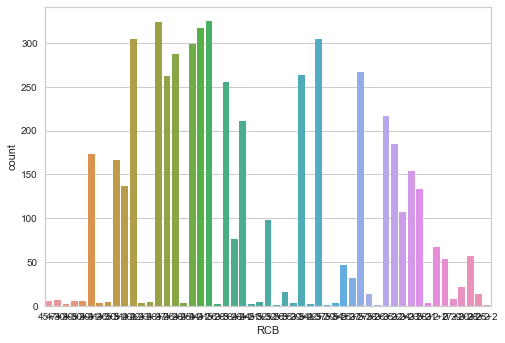

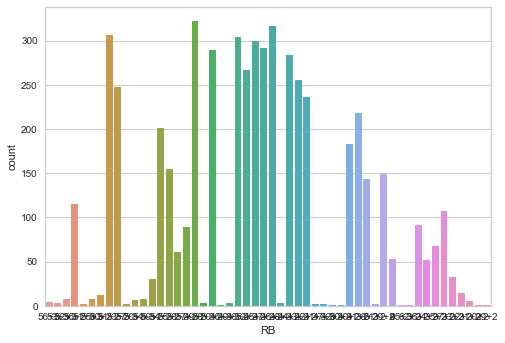

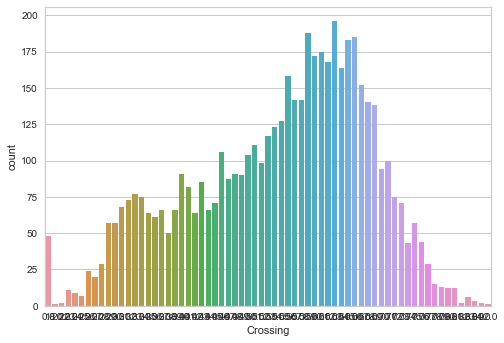

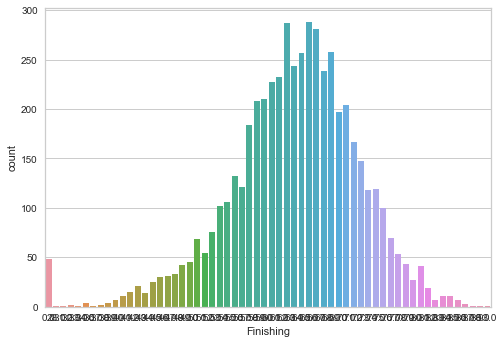

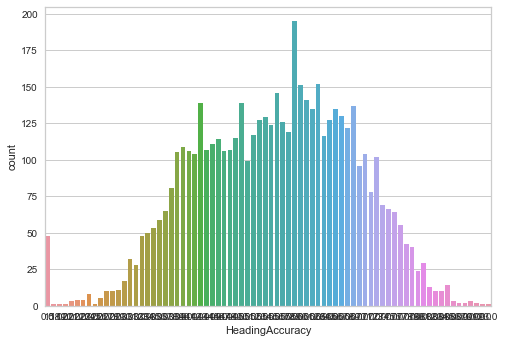

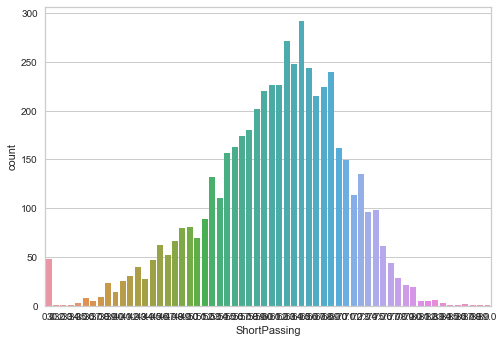

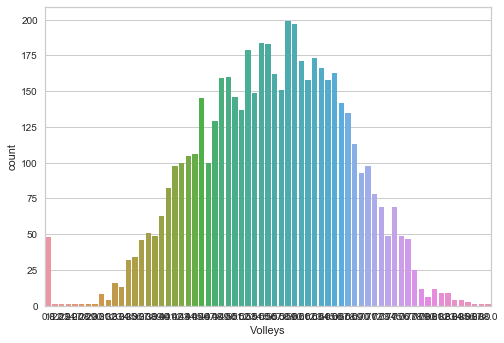

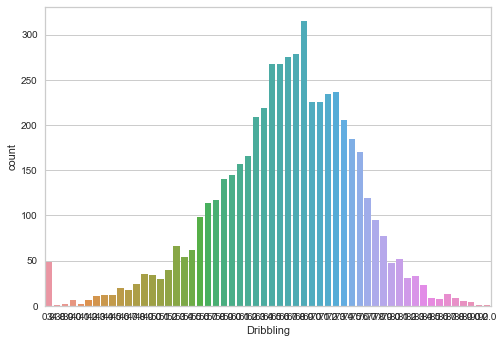

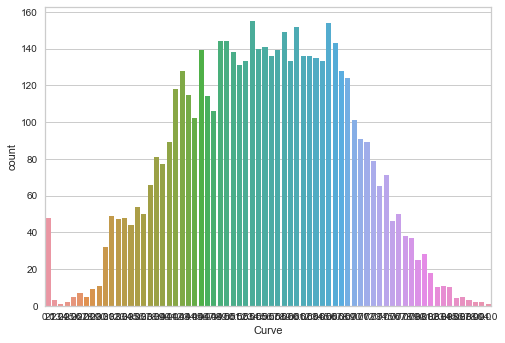

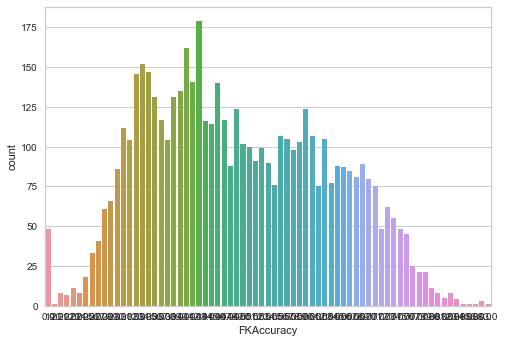

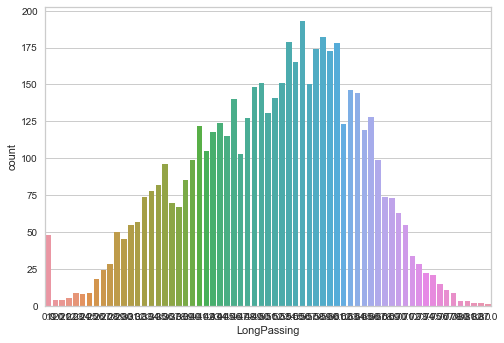

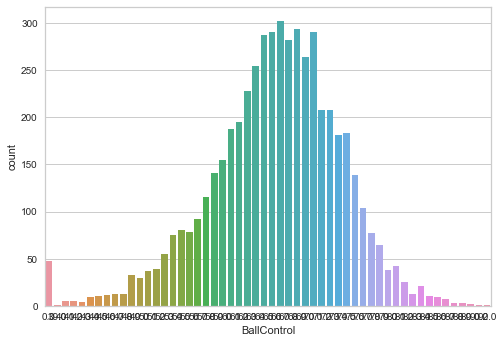

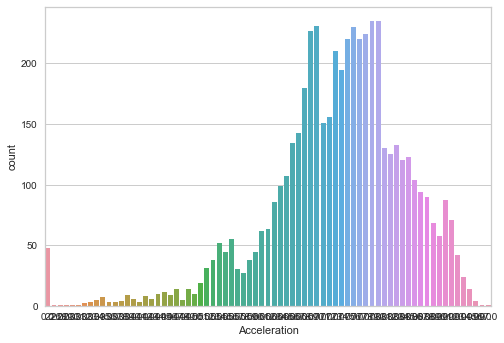

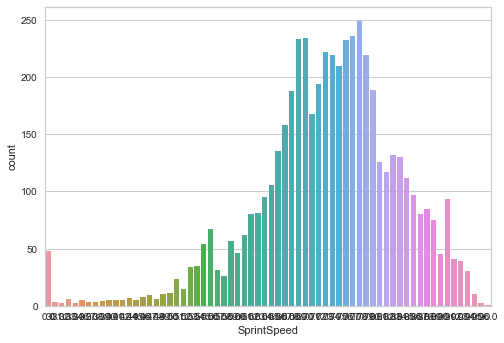

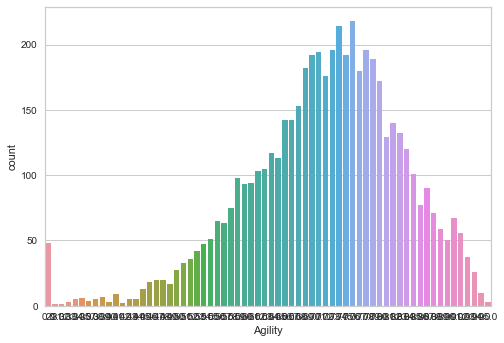

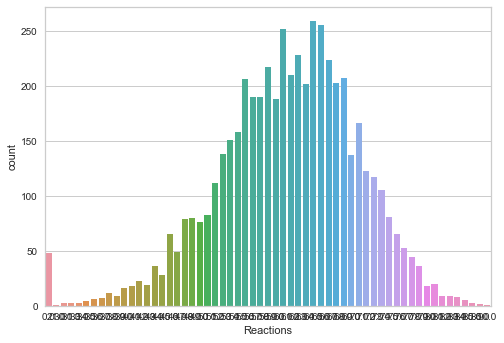

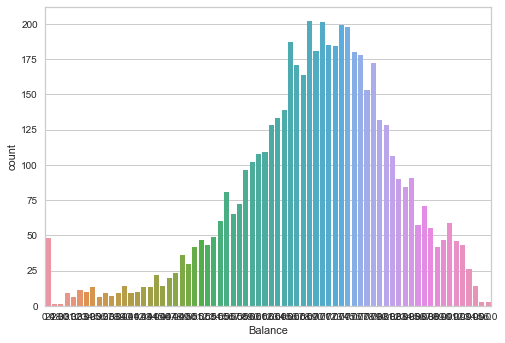

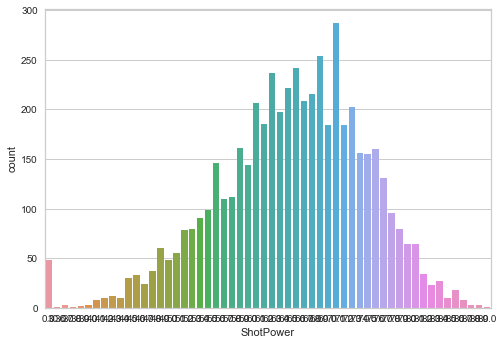

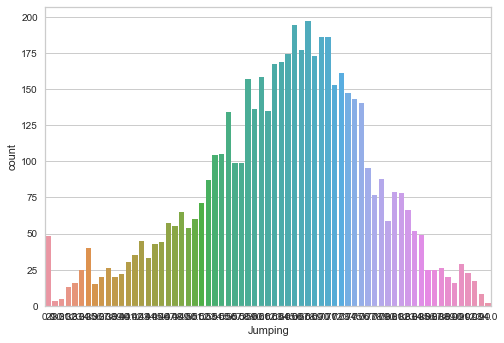

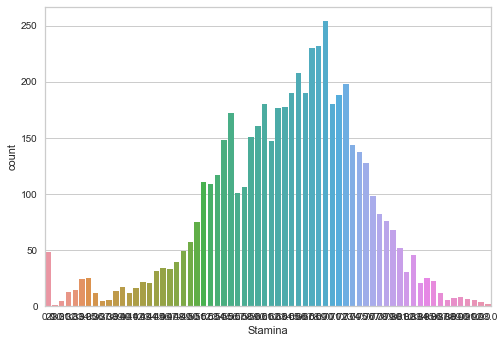

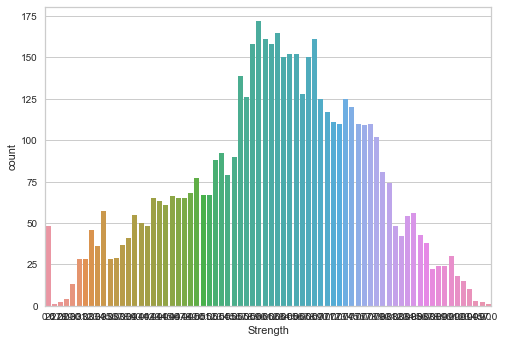

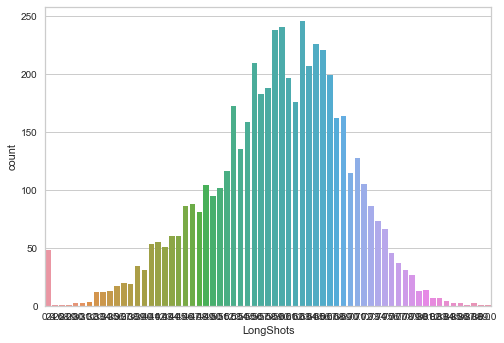

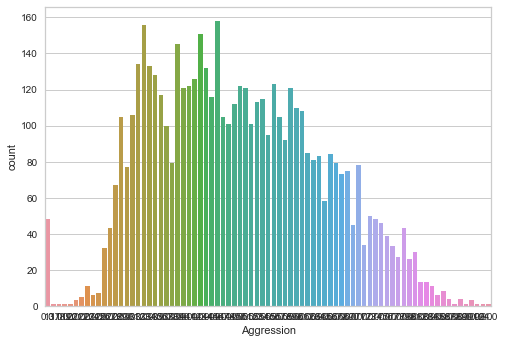

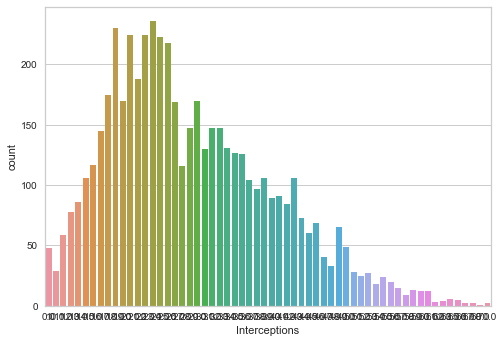

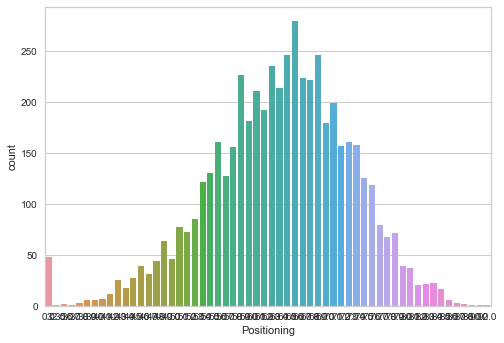

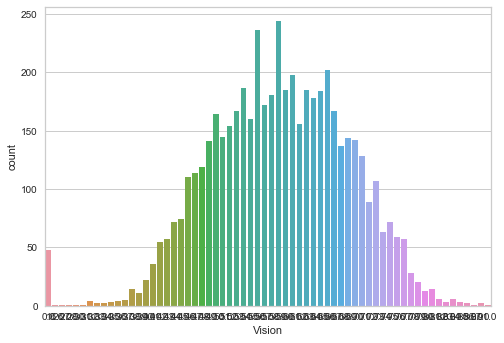

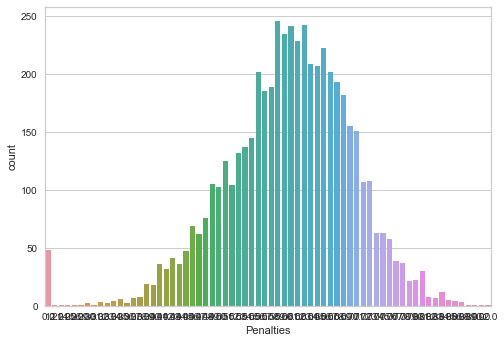

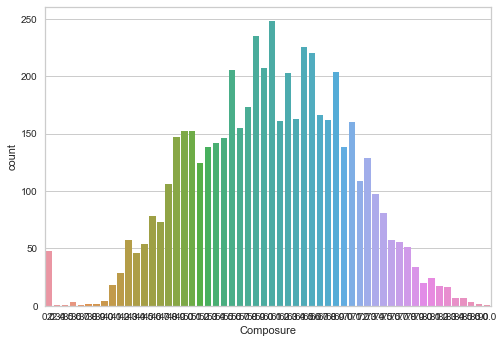

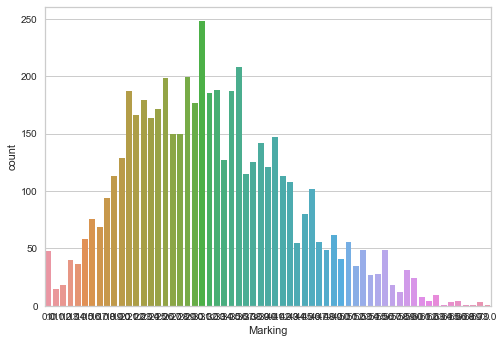

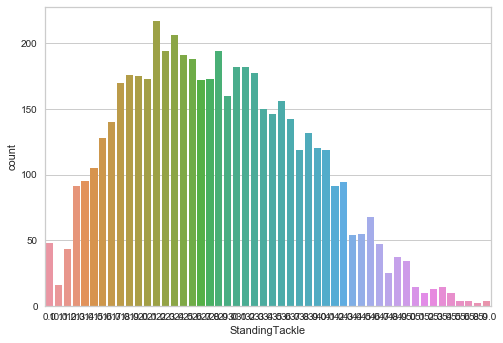

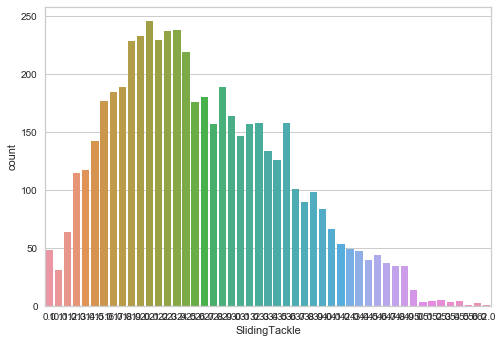

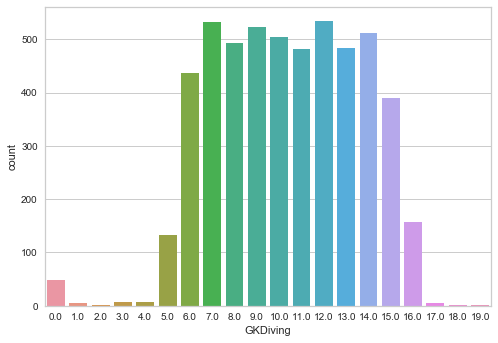

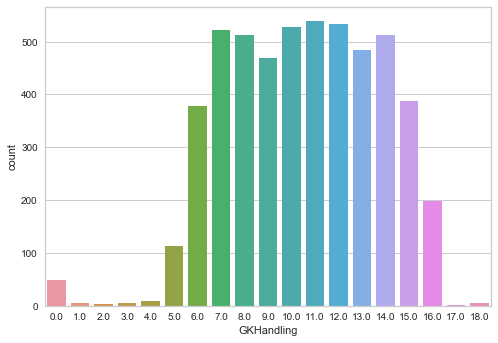

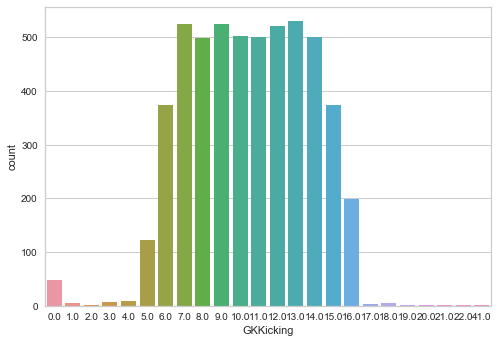

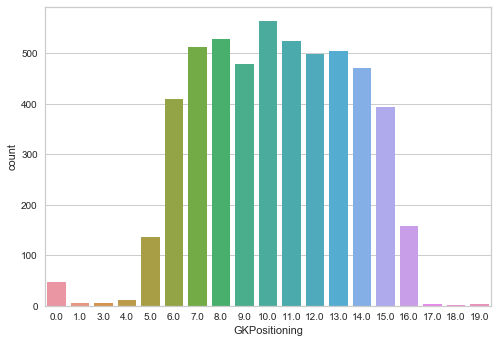

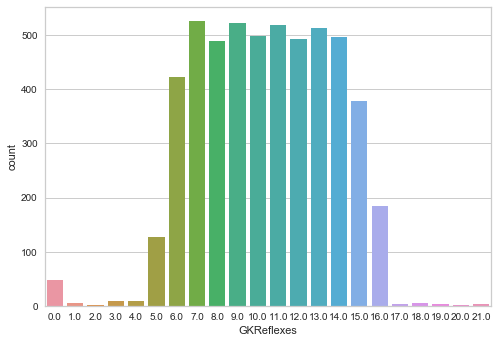

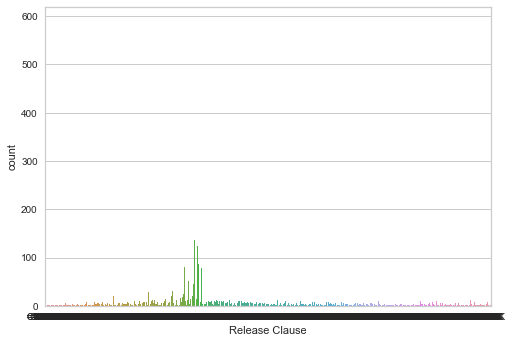

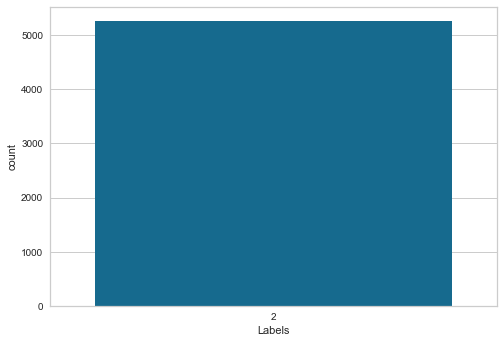

In [57]:
for column in c.columns:
    sns.countplot(c[column])
    plt.show()

## 5. Standardize information and apllying DBSCAN

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
scaler = StandardScaler()

In [60]:
numerical_DBSCAN = ['Overall','Potential','Composure','Marking','StandingTackle','SlidingTackle',
           'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
fifa[numerical_DBSCAN].head(3)

Overall  Potential  Composure  Marking  StandingTackle  SlidingTackle  \
0       94         94       96.0     33.0            28.0           26.0   
1       94         94       95.0     28.0            31.0           23.0   
2       92         93       94.0     27.0            24.0           33.0   

   GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  
0       6.0        11.0       15.0           14.0         8.0  
1       7.0        11.0       15.0           14.0        11.0  
2       9.0         9.0       15.0           15.0        11.0

In [61]:
numerical_DBSCAN=fifa.fillna(0)
numerical_DBSCAN=numerical_DBSCAN[['Overall','Potential','Composure','Marking','StandingTackle','SlidingTackle',
           'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]

In [62]:
numerical_DBSCAN.isna().sum()

Overall           0
Potential         0
Composure         0
Marking           0
StandingTackle    0
SlidingTackle     0
GKDiving          0
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
dtype: int64

In [63]:
scaler.fit(numerical_DBSCAN)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
scaled = scaler.transform(numerical_DBSCAN)

In [65]:
scaled = pd.DataFrame(scaled, columns = numerical)
scaled.head(3)

Overall  Potential  Composure   Marking  StandingTackle  SlidingTackle  \
0  4.018287   3.698092   3.175799 -0.706968       -0.898930      -0.913603   
1  4.018287   3.698092   3.091125 -0.956657       -0.761143      -1.053862   
2  3.728799   3.535128   3.006452 -1.006595       -1.082647      -0.586332   

   GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  
0 -0.597580   -0.316378   -0.07207      -0.137719   -0.482794  
1 -0.541058   -0.316378   -0.07207      -0.137719   -0.315676  
2 -0.428012   -0.434686   -0.07207      -0.079007   -0.315676

In [66]:
a_DBSCAN = DBSCAN(eps=0.8)
a_DBSCAN.fit(scaled)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [67]:
fifa['Labels_DBSCAN']=a_DBSCAN.labels_
fifa.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004           0                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018           0                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017           0                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011           0                 2020    6'4  168lbs     0     0   
4  Aug 30, 2015           0                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     

In [68]:
fifa['Labels_DBSCAN'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [69]:
#I tryed to extract information by using the DBSCAN, but it wasn't very efective.

### 5.1 Using PCA to plot information (DBSCAN)

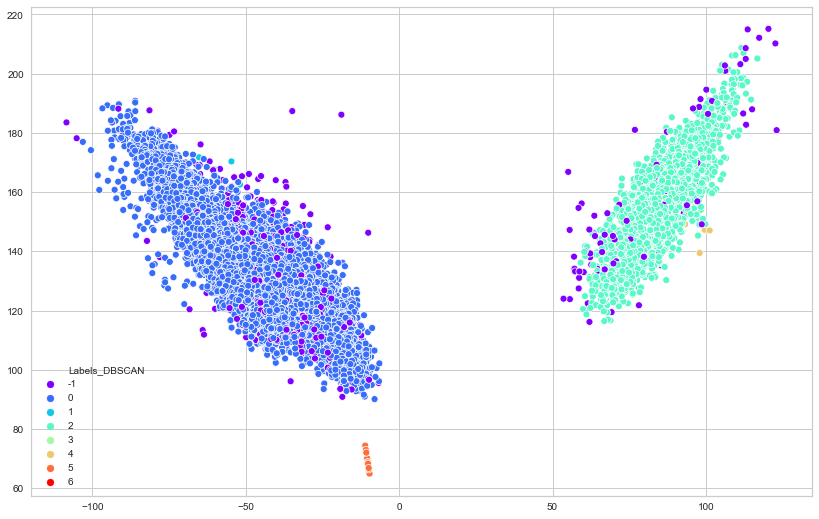

In [70]:
fig, ax = plt.subplots(figsize=(14,9))

sns.scatterplot(pc1, pc2, hue=fifa['Labels_DBSCAN'],palette='rainbow',legend="full")
plt.show()

In [71]:
print('It is not possible to extrack many information from this data. Kmeans gets us a better understanding of the data.')

It is not possible to extrack many information from this data. Kmeans gets us a better understanding of the data.


## 7. Comparing data to find similar characteristics

In [72]:
fifa.groupby(['Labels']).mean()

ID        Age    Overall  Potential      Special  \
Labels                                                                
0       205110.167331  26.320403  72.752988  76.205494  1825.081988   
1       207870.497532  26.045903  64.599704  69.792695  1046.197927   
2       218552.497148  24.348859  65.883650  71.611977  1631.754373   
3       219900.471391  24.550390  62.032185  67.748537  1574.265930   

        International Reputation  Weak Foot  Skill Moves  Jersey Number  \
Labels                                                                    
0                       1.293772   3.051793     2.702034      16.311596   
1                       1.095755   2.490128     1.000000      20.506417   
2                       1.071293   3.094106     2.738973      21.713118   
3                       1.006177   2.868336     2.204161      19.693758   

         Crossing  Finishing  HeadingAccuracy  ShortPassing    Volleys  \
Labels                                                                   
0       60.126651  49.036066        62.773118     69.908996  48.111973   
1       14.257651  12.020237        14.369200     27.267029  12.399309   
2       53.450570  62.730038        54.470722     60.352852  55.482700   
3       49.795676  38.848017        54.403283     58.452048  37.837939   

        Dribbling      Curve  FKAccuracy  LongPassing  BallControl  \
Labels                                                               
0       64.258545  56.281820   51.208849    65.365485    68.788425   
1       13.856367  14.707799   14.462981    25.806515    19.946199   
2       65.359506  54.674715   48.110646    50.522243    65.085361   
3       53.180917  44.014954   40.925390    53.224480    56.748862   

        Acceleration  SprintSpeed    Agility  Reactions    Balance  ShotPower  \
Labels                                                                          
0          67.180541    67.477878  66.734326  69.386874  66.084714  64.420004   
1          38.328727    38.715696  40.213722  58.929418  43.099704  22.528628   
2          72.097338    71.991065  70.557605  60.369011  68.786122  64.241255   
3          64.378576    64.444733  62.142393  57.713427  64.576723  51.418726   

          Jumping    Stamina   Strength  LongShots  Aggression  Interceptions  \
Labels                                                                          
0       68.906479  73.274481  70.806249  55.485427   70.037744      66.732439   
1       57.703850  30.462488  60.589339  12.654985   26.372655      17.055281   
2       63.359316  63.021483  61.326806  58.203802   48.524144      28.137452   
3       65.534135  65.889954  65.505852  42.111346   60.443270      56.435306   

        Positioning     Vision  Penalties  Composure    Marking  \
Labels                                                            
0         56.433844  60.490669  53.191025  68.528832  66.024533   
1         11.259131  36.992596  20.005429  45.125864  15.223593   
2         62.818631  57.846768  59.489544  59.587452  31.227376   
3         46.298114  49.090702  44.616385  54.181567  56.667263   

        StandingTackle  SlidingTackle   GKDiving  GKHandling  GKKicking  \
Labels                                                                    
0            68.125183      65.352275  10.585448   10.637241  10.661564   
1            14.141658      14.071076  65.317868   62.860809  61.477789   
2            27.724335      25.540684  10.350760   10.474715  10.478327   
3            59.618823      57.647757  10.480007   10.480007  10.442620   

        GKPositioning  GKReflexes  Labels_DBSCAN  
Labels                                            
0           10.647725   10.545397      -0.032292  
1           63.044423   66.098717       1.822804  
2           10.353802   10.399430       0.021483  
3           10.506827   10.491710      -0.016092

In [73]:
fifa.groupby(['Nationality']).count()

ID  Name  Age  Photo  Flag  Overall  Potential  Club  Club Logo  \
Nationality                                                                     
Afghanistan    4     4    4      4     4        4          4     4          4   
Albania       40    40   40     40    40       40         40    40         40   
Algeria       60    60   60     60    60       60         60    60         60   
Andorra        1     1    1      1     1        1          1     1          1   
Angola        15    15   15     15    15       15         15    15         15   
...          ...   ...  ...    ...   ...      ...        ...   ...        ...   
Uzbekistan     2     2    2      2     2        2          2     2          2   
Venezuela     67    67   67     67    67       67         67    67         67   
Wales        129   129  129    129   129      129        129   129        129   
Zambia         9     9    9      9     9        9          9     9          9   
Zimbabwe      13    13   13     13    13       13         13    13         13   

             Value  Wage  Special  Preferred Foot  International Reputation  \
Nationality                                                                   
Afghanistan      4     4        4               4                         4   
Albania         40    40       40              40                        40   
Algeria         60    60       60              60                        60   
Andorra          1     1        1               1                         1   
Angola          15    15       15              15                        15   
...            ...   ...      ...             ...                       ...   
Uzbekistan       2     2        2               2                         2   
Venezuela       67    67       67              67                        67   
Wales          129   129      129             129                       129   
Zambia           9     9        9               9                         9   
Zimbabwe        13    13       13              13                        13   

             Weak Foot  Skill Moves  Work Rate  Body Type  Real Face  \
Nationality                                                            
Afghanistan          4            4          4          4          4   
Albania             40           40         40         40         40   
Algeria             60           60         60         60         60   
Andorra              1            1          1          1          1   
Angola              15           15         15         15         15   
...                ...          ...        ...        ...        ...   
Uzbekistan           2            2          2          2          2   
Venezuela           67           67         67         67         67   
Wales              129          129        129        129        129   
Zambia               9            9          9          9          9   
Zimbabwe            13           13         13         13         13   

             Position  Jersey Number  Joined  Loaned From  \
Nationality                                                 
Afghanistan         4              4       4            4   
Albania            40             40      40           40   
Algeria            60             60      60           60   
Andorra             1              1       1            1   
Angola             15             15      15           15   
...               ...            ...     ...          ...   
Uzbekistan          2              2       2            2   
Venezuela          67             67      67           67   
Wales             129            129     129          129   
Zambia              9              9       9            9   
Zimbabwe           13             13      13           13   

             Contract Valid Until  Height  Weight   LS   ST   RS   LW   LF  \
Nationality                                                                  
Afghanistan                     4       4    

### 7.1 Analysing graphs

In [74]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

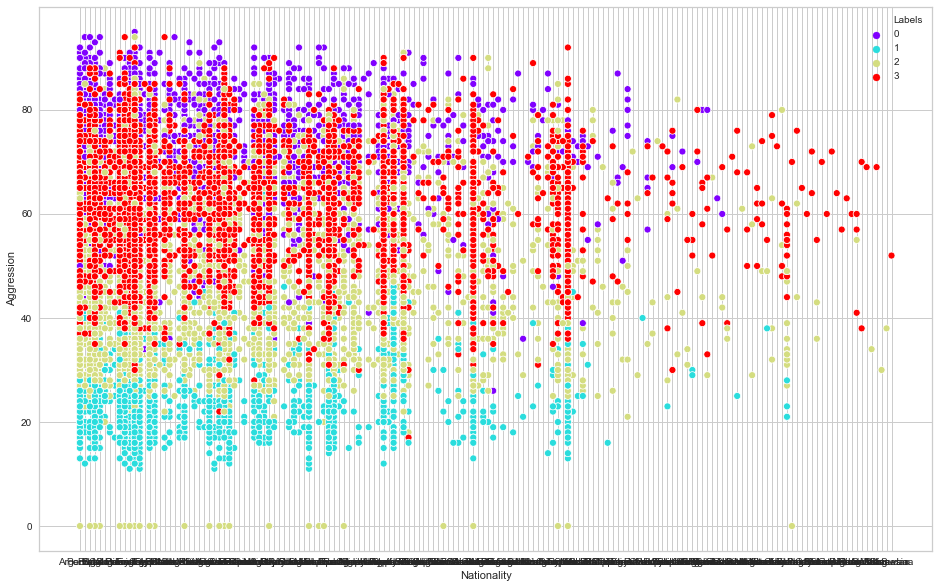

In [75]:
fig, ax = plt.subplots(figsize=(16,10))

sns.scatterplot(fifa['Nationality'],fifa['Aggression'],hue=fifa['Labels'],palette='rainbow',legend='full')

plt.show()

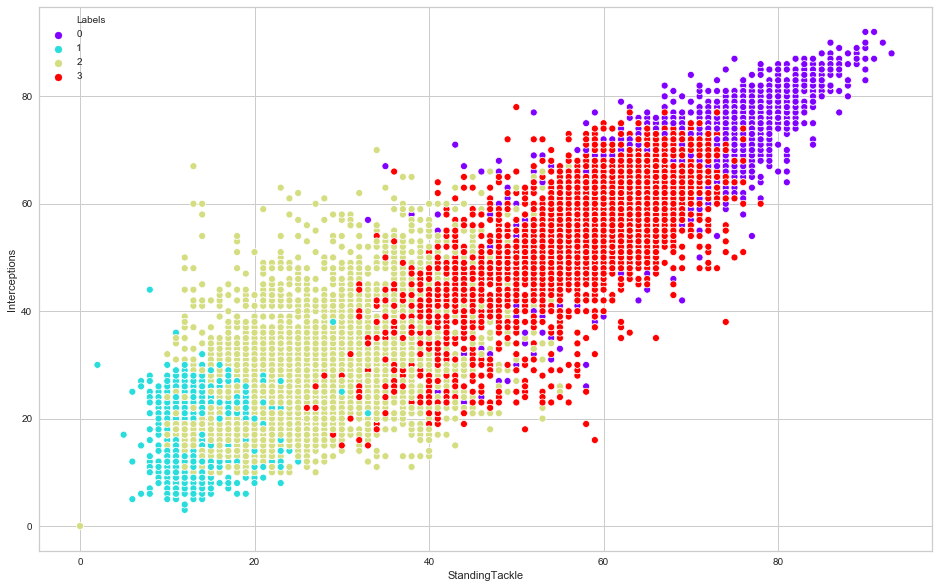

In [76]:
fig, ax = plt.subplots(figsize=(16,10))

sns.scatterplot(fifa['StandingTackle'],fifa['Interceptions'],hue=fifa['Labels'],palette='rainbow',legend='full')

plt.show()

### 7.2 Hierarquical

### 7.3 Using Get Dumies

In [79]:
fifa2=fifa

In [80]:
fifa2.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [83]:
fifa2=fifa.drop(columns=['Name','Photo','Flag','Club Logo','Release Clause','Value','Wage'])

In [84]:
fifa2=pd.get_dummies(fifa,drop_first=True)


In [85]:
fifa.shape

(18207, 90)

In [86]:
fifa2.shape

(18207, 43524)

### 7.3.1 To Use get dummies, it is necessary to exclude a few columns and convert other columns from strings to numerical. 

In [87]:
# we drop useless columns
fifa = fifa.drop(['Photo','Flag','Club Logo','Real Face','Joined'],axis=1).set_index(keys=['ID'])

# loaned from: if player is loaned from another team. We change NaN to "No"
fifa.loc[:,'Loaned From'] = fifa.loc[:,'Loaned From'].fillna('not-loaned')

fifa = fifa.dropna()

fifa.loc[:,'Value'] = fifa.loc[:,'Value'].apply(lambda x: x.split('€')[1] if x == str else x)
fifa.loc[:,'Value'] = fifa.loc[:,'Value'].apply(lambda x: float(x.split('M')[0]) *1000000 if x.endswith('M') else x)
fifa.loc[:,'Value'] = fifa.loc[:,'Value'].apply(lambda x: float(x.split('K')[0]) *1000 if str(x).endswith('K') else x)
fifa.loc[:,'Value'] = fifa.loc[:,'Value'].apply(lambda x: float(x))

fifa.loc[:,'Wage'] = fifa.loc[:,'Wage'].apply(lambda x: x.split('€')[1])
fifa.loc[:,'Wage'] = fifa.loc[:,'Wage'].apply(lambda x: float(x.split('M')[0]) *1000000 if x.endswith('M') else x)
fifa.loc[:,'Wage'] = fifa.loc[:,'Wage'].apply(lambda x: float(x.split('K')[0]) *1000 if str(x).endswith('K') else x)
fifa.loc[:,'Wage'] = fifa.loc[:,'Wage'].apply(lambda x: float(x))

fifa.loc[:,'Release Clause'] = fifa.loc[:,'Release Clause'].apply(lambda x: x.split('€')[1])
fifa.loc[:,'Release Clause'] = fifa.loc[:,'Release Clause'].apply(lambda x: float(x.split('M')[0]) *1000000 if x.endswith('M') else x)
fifa.loc[:,'Release Clause'] = fifa.loc[:,'Release Clause'].apply(lambda x: float(x.split('K')[0]) *1000 if str(x).endswith('K') else x)
fifa.loc[:,'Release Clause'] = fifa.loc[:,'Release Clause'].apply(lambda x: float(x))

# 1 feet = 0.3048 m
# 1 inch = 0.0254 m
fifa.loc[:,'Height'] = fifa.loc[:,'Height'].apply(lambda x: float(x.split("'")[0]) * 0.3048 + float(x.split("'")[1]) * 0.0254)

# 1 lb = 0.453592 kg
fifa.loc[:,'Weight'] = fifa.loc[:,'Weight'].apply(lambda x: float(x.split('lbs')[0]) *0.453592)

my_list = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

fifa.loc[:,my_list] = fifa.loc[:,my_list].applymap(lambda x: int(x.split('+')[0]) + int(x.split('+')[1]))

ValueError: could not convert string to float: '€110.5'

In [88]:
# we need to repair errors to get numerical columns to put in dataset before run with get dummies.

## Comparing plots from diferent groups to find retions between them

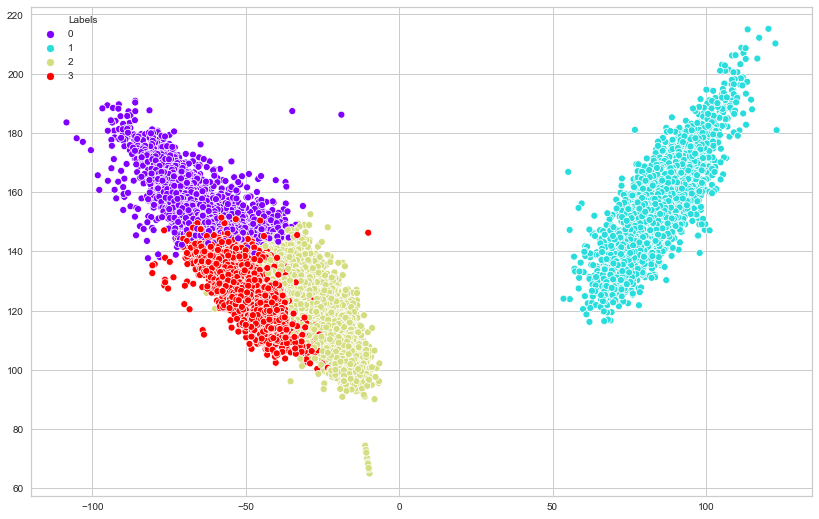

In [89]:
# Same graphic used on PCA (Kmeans)

fig, ax = plt.subplots(figsize=(14,9))

sns.scatterplot(pc1, pc2, hue=fifa['Labels'],palette='rainbow')
plt.show()

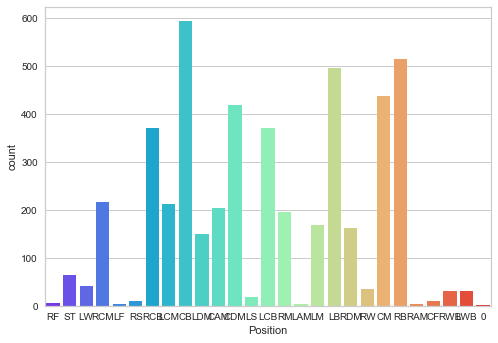

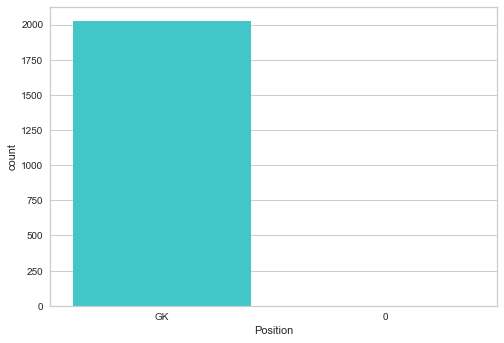

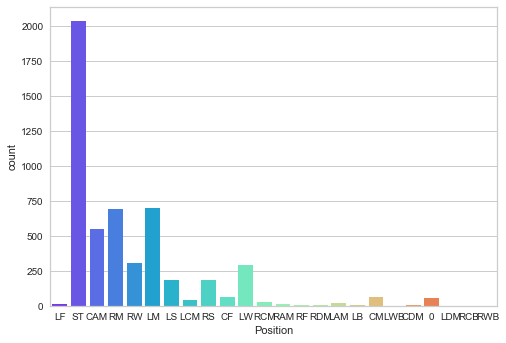

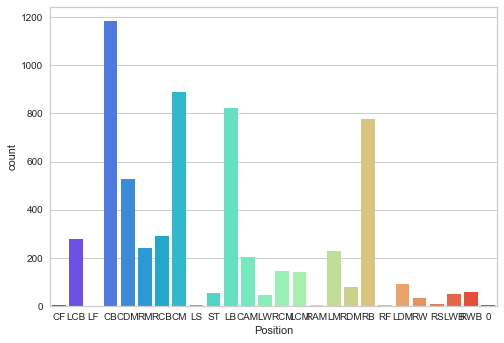

In [91]:
sns.countplot(a['Position'],palette='rainbow')
plt.show()

sns.countplot(b['Position'],palette='rainbow')
plt.show()

sns.countplot(c['Position'],palette='rainbow')
plt.show()

sns.countplot(d['Position'],palette='rainbow')
plt.show()

In [92]:
# We can see, in the gorup 1, the are only GK, in group 2 they are mixed but there are more players in the ST group, 
# then any other, and in group 3, are even more mixed with other positions. in the group 0, they are mixed but there are 4
# positions with more players.

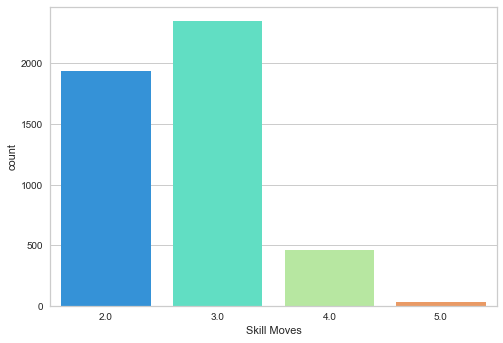

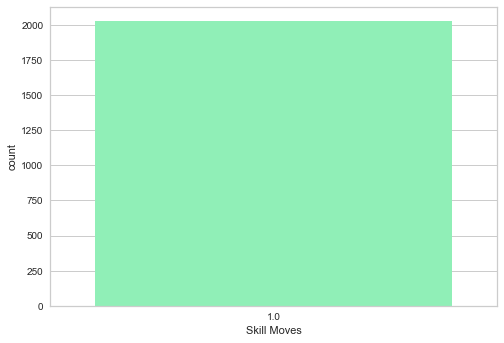

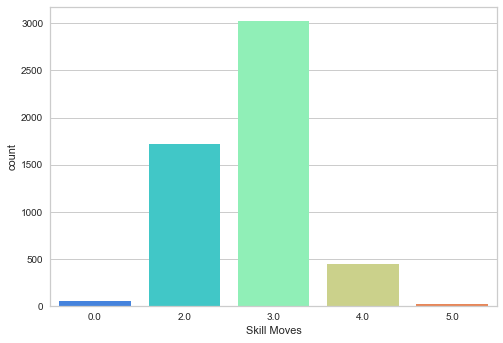

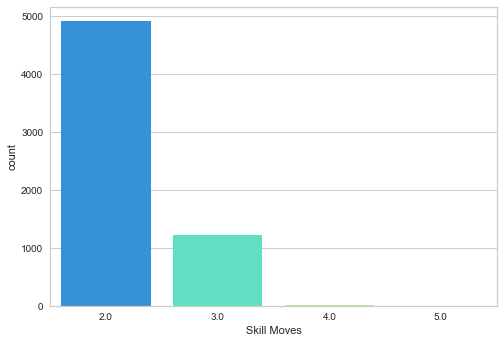

In [99]:
sns.countplot(a['Skill Moves'],palette='rainbow')
plt.show()

sns.countplot(b['Skill Moves'],palette='rainbow')
plt.show()

sns.countplot(c['Skill Moves'],palette='rainbow')
plt.show()

sns.countplot(d['Skill Moves'],palette='rainbow')
plt.show()

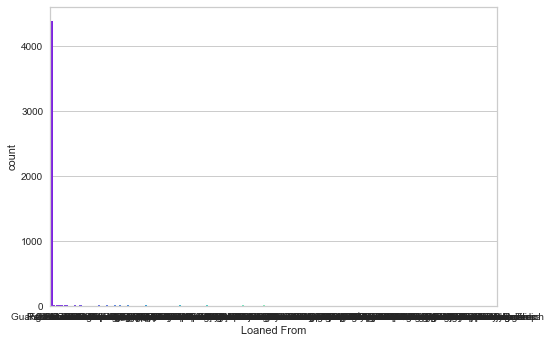

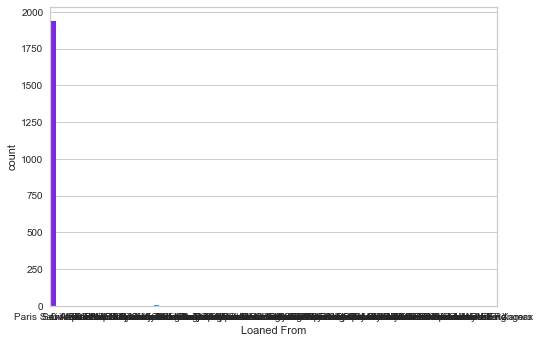

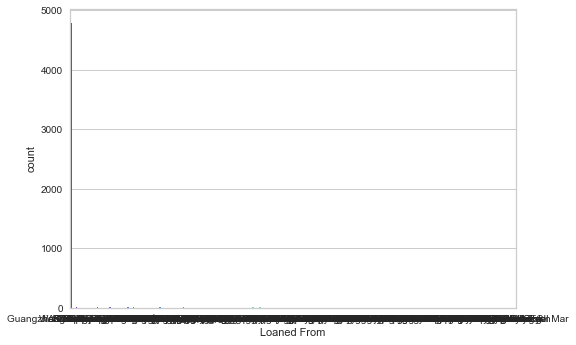

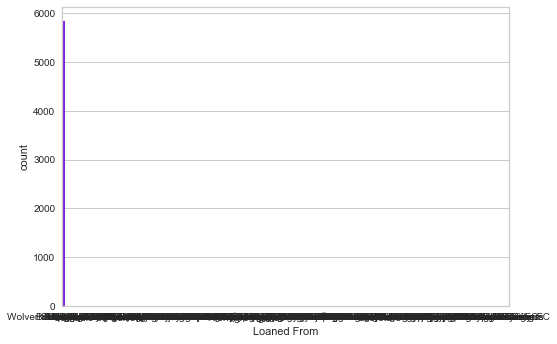

In [102]:
sns.countplot(a['Loaned From'],palette='rainbow')
plt.show()

sns.countplot(b['Loaned From'],palette='rainbow')
plt.show()

sns.countplot(c['Loaned From'],palette='rainbow')
plt.show()

sns.countplot(d['Loaned From'],palette='rainbow')
plt.show()

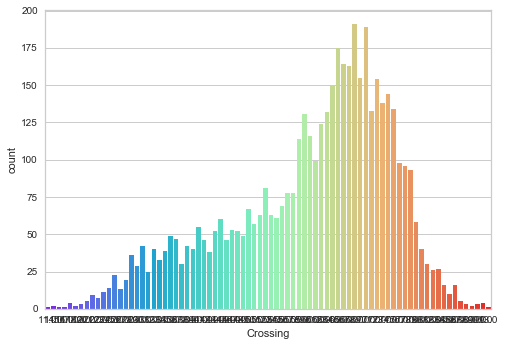

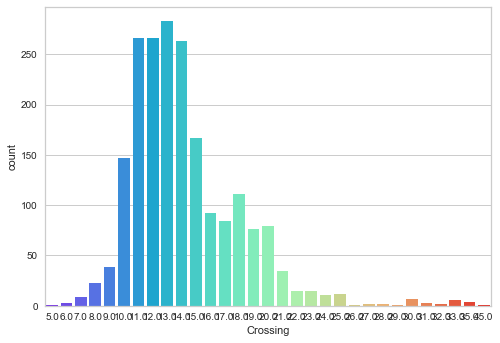

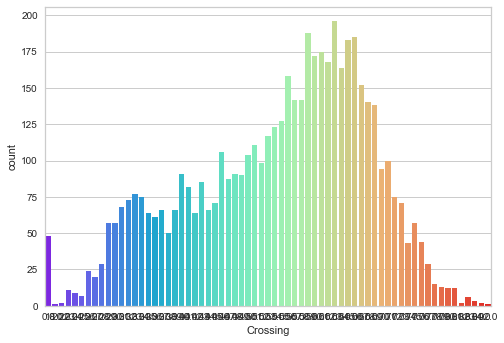

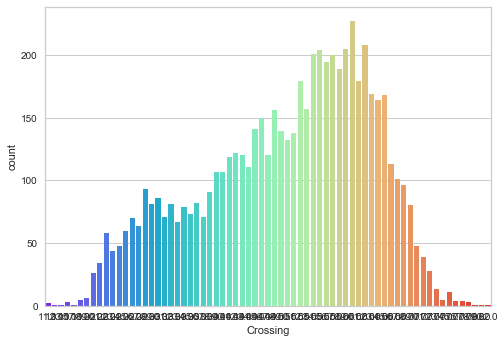

In [103]:
sns.countplot(a['Crossing'],palette='rainbow')
plt.show()

sns.countplot(b['Crossing'],palette='rainbow')
plt.show()

sns.countplot(c['Crossing'],palette='rainbow')
plt.show()

sns.countplot(d['Crossing'],palette='rainbow')
plt.show()

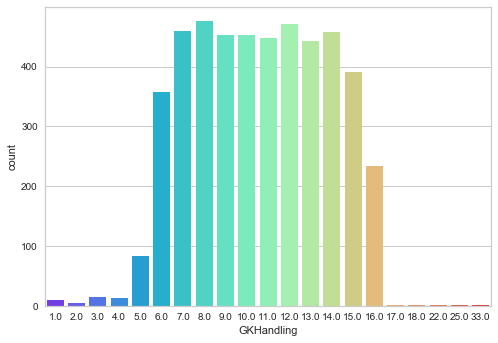

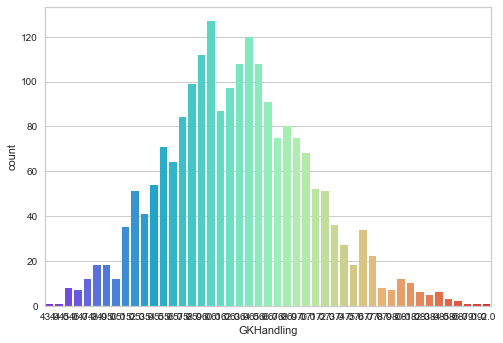

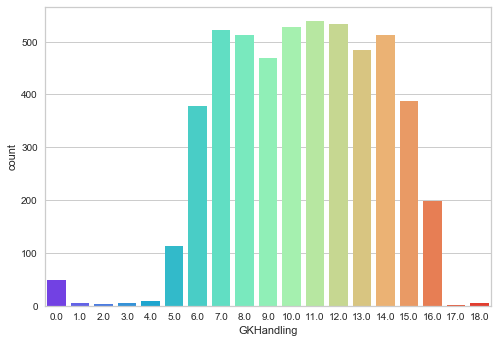

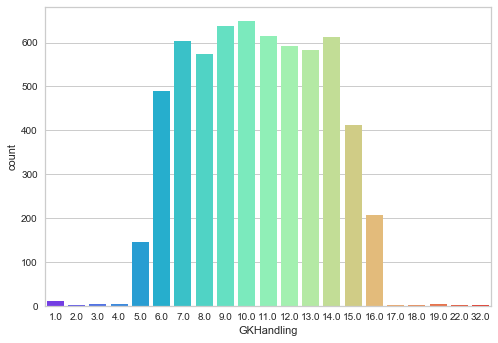

In [104]:
sns.countplot(a['GKHandling'],palette='rainbow')
plt.show()

sns.countplot(b['GKHandling'],palette='rainbow')
plt.show()

sns.countplot(c['GKHandling'],palette='rainbow')
plt.show()

sns.countplot(d['GKHandling'],palette='rainbow')
plt.show()

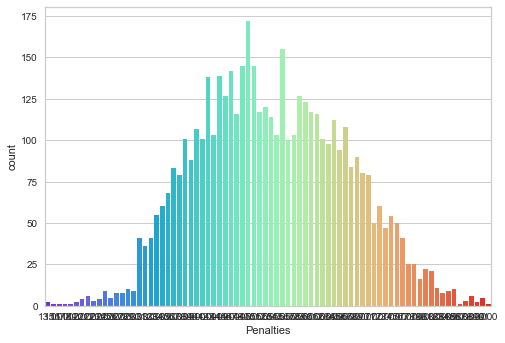

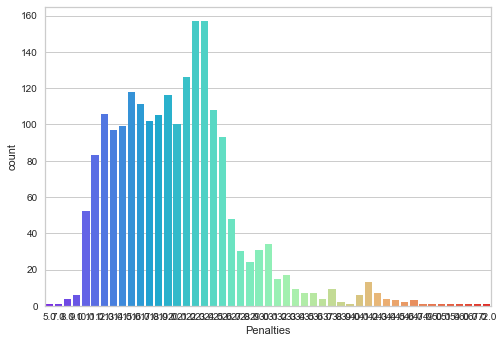

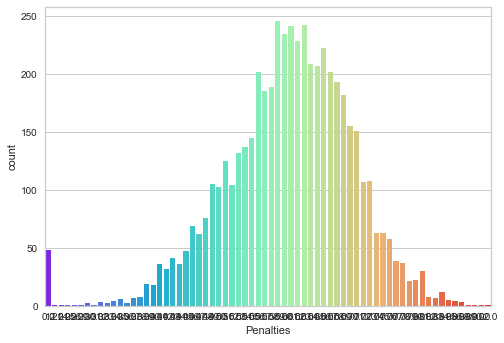

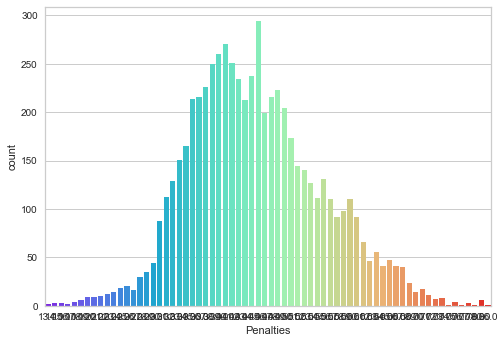

In [105]:
sns.countplot(a['Penalties'],palette='rainbow')
plt.show()

sns.countplot(b['Penalties'],palette='rainbow')
plt.show()

sns.countplot(c['Penalties'],palette='rainbow')
plt.show()

sns.countplot(d['Penalties'],palette='rainbow')
plt.show()

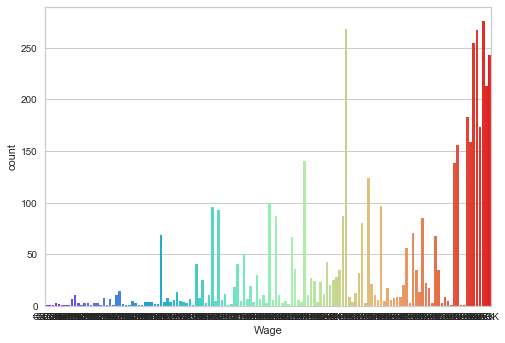

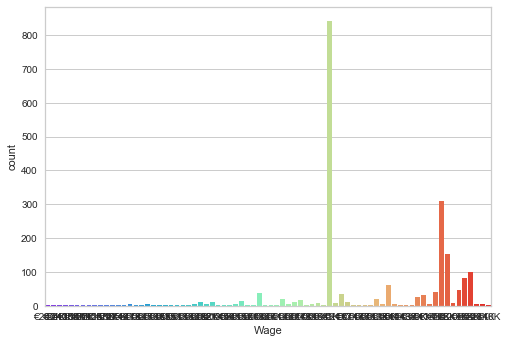

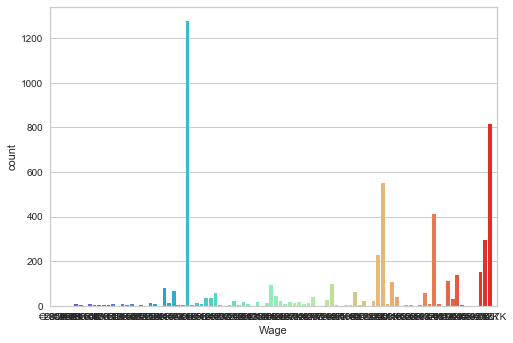

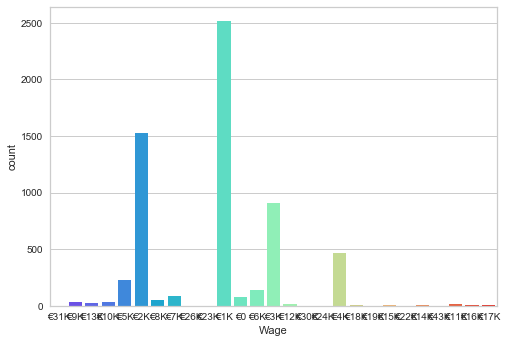

In [106]:
sns.countplot(a['Wage'],palette='rainbow')
plt.show()

sns.countplot(b['Wage'],palette='rainbow')
plt.show()

sns.countplot(c['Wage'],palette='rainbow')
plt.show()

sns.countplot(d['Wage'],palette='rainbow')
plt.show()

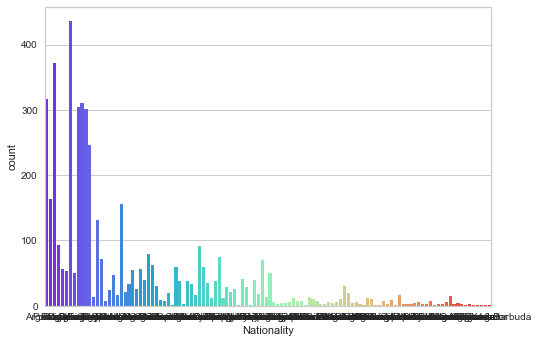

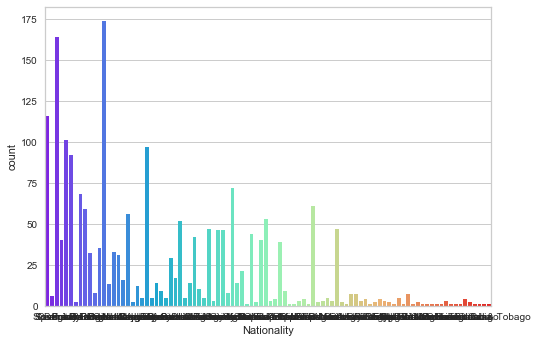

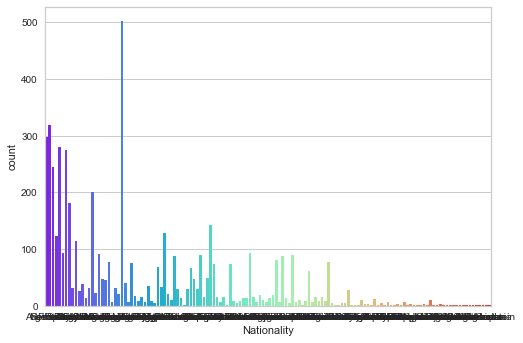

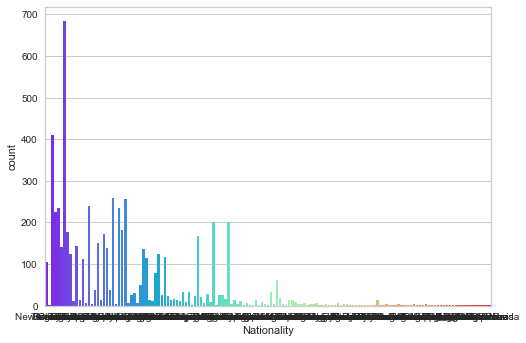

In [107]:
sns.countplot(a['Nationality'],palette='rainbow')
plt.show()

sns.countplot(b['Nationality'],palette='rainbow')
plt.show()

sns.countplot(c['Nationality'],palette='rainbow')
plt.show()

sns.countplot(d['Nationality'],palette='rainbow')
plt.show()

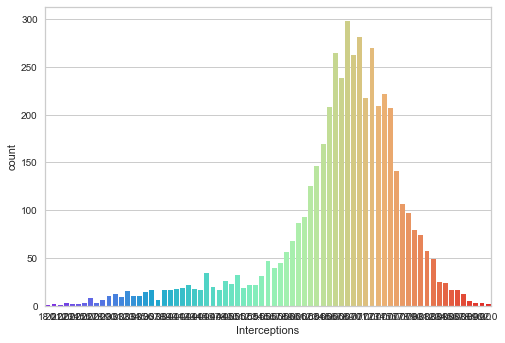

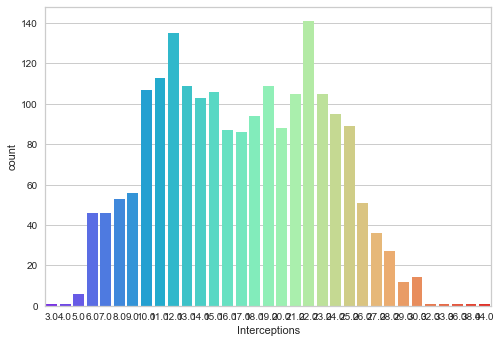

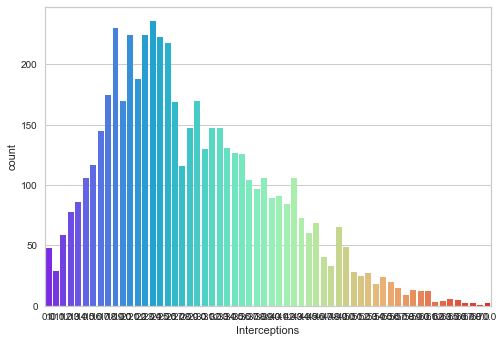

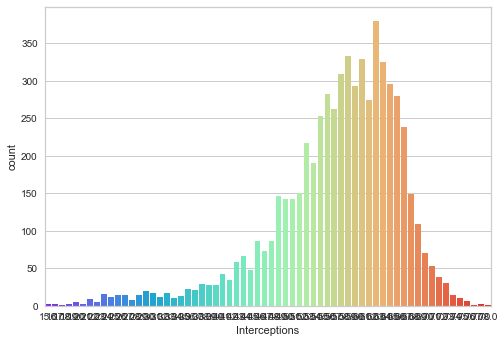

In [108]:
sns.countplot(a['Interceptions'],palette='rainbow')
plt.show()

sns.countplot(b['Interceptions'],palette='rainbow')
plt.show()

sns.countplot(c['Interceptions'],palette='rainbow')
plt.show()

sns.countplot(d['Interceptions'],palette='rainbow')
plt.show()

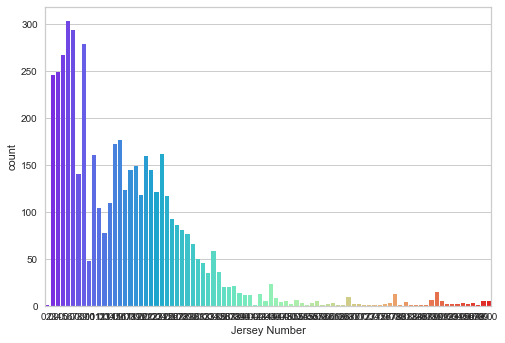

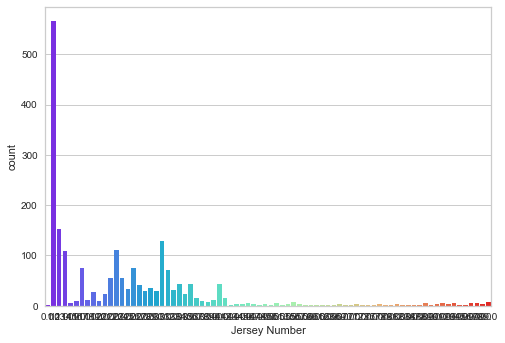

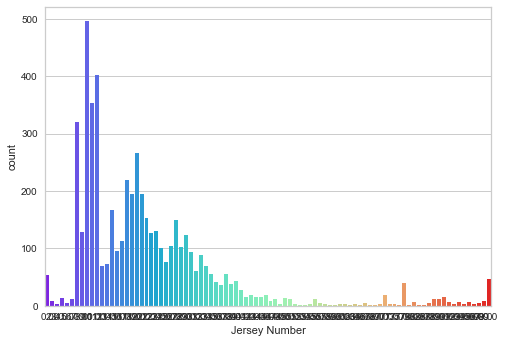

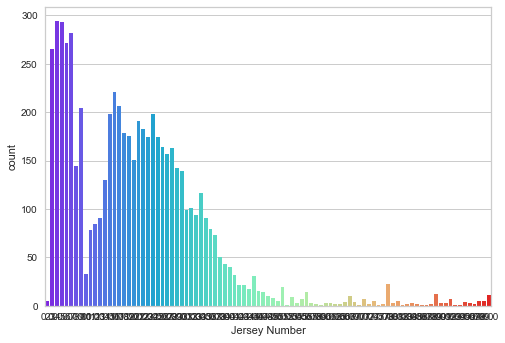

In [109]:
sns.countplot(a['Jersey Number'],palette='rainbow')
plt.show()

sns.countplot(b['Jersey Number'],palette='rainbow')
plt.show()

sns.countplot(c['Jersey Number'],palette='rainbow')
plt.show()

sns.countplot(d['Jersey Number'],palette='rainbow')
plt.show()